# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [121]:
# Importing necessary libraries
# Core Python
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Model building & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score


#### **1.1.1**
Load the dataset

In [122]:
# Load the data
# Load the dataset
import pandas as pd

file_path = "Car_Price_data.csv"  # Update path if your file is in another directory

df = pd.read_csv(file_path)

print("Data loaded successfully.")
print("Shape:", df.shape)

# Preview first few rows
df.head()


Data loaded successfully.
Shape: (15915, 23)


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [123]:
# Find the proportion of missing values in each column and handle if found

missing_pct = df.isnull().mean().sort_values(ascending=False)

print("Missing value percentage per column:")
print(missing_pct)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nMissing values handled successfully.")

Missing value percentage per column:
make_model             0.0
age                    0.0
Drive_chain            0.0
Weight_kg              0.0
Displacement_cc        0.0
Gearing_Type           0.0
Upholstery_type        0.0
Paint_Type             0.0
Inspection_new         0.0
hp_kW                  0.0
Previous_Owners        0.0
Safety_Security        0.0
body_type              0.0
Extras                 0.0
Entertainment_Media    0.0
Comfort_Convenience    0.0
Gears                  0.0
Fuel                   0.0
Type                   0.0
km                     0.0
vat                    0.0
price                  0.0
cons_comb              0.0
dtype: float64

Missing values handled successfully.


**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

Numerical features: ['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb']


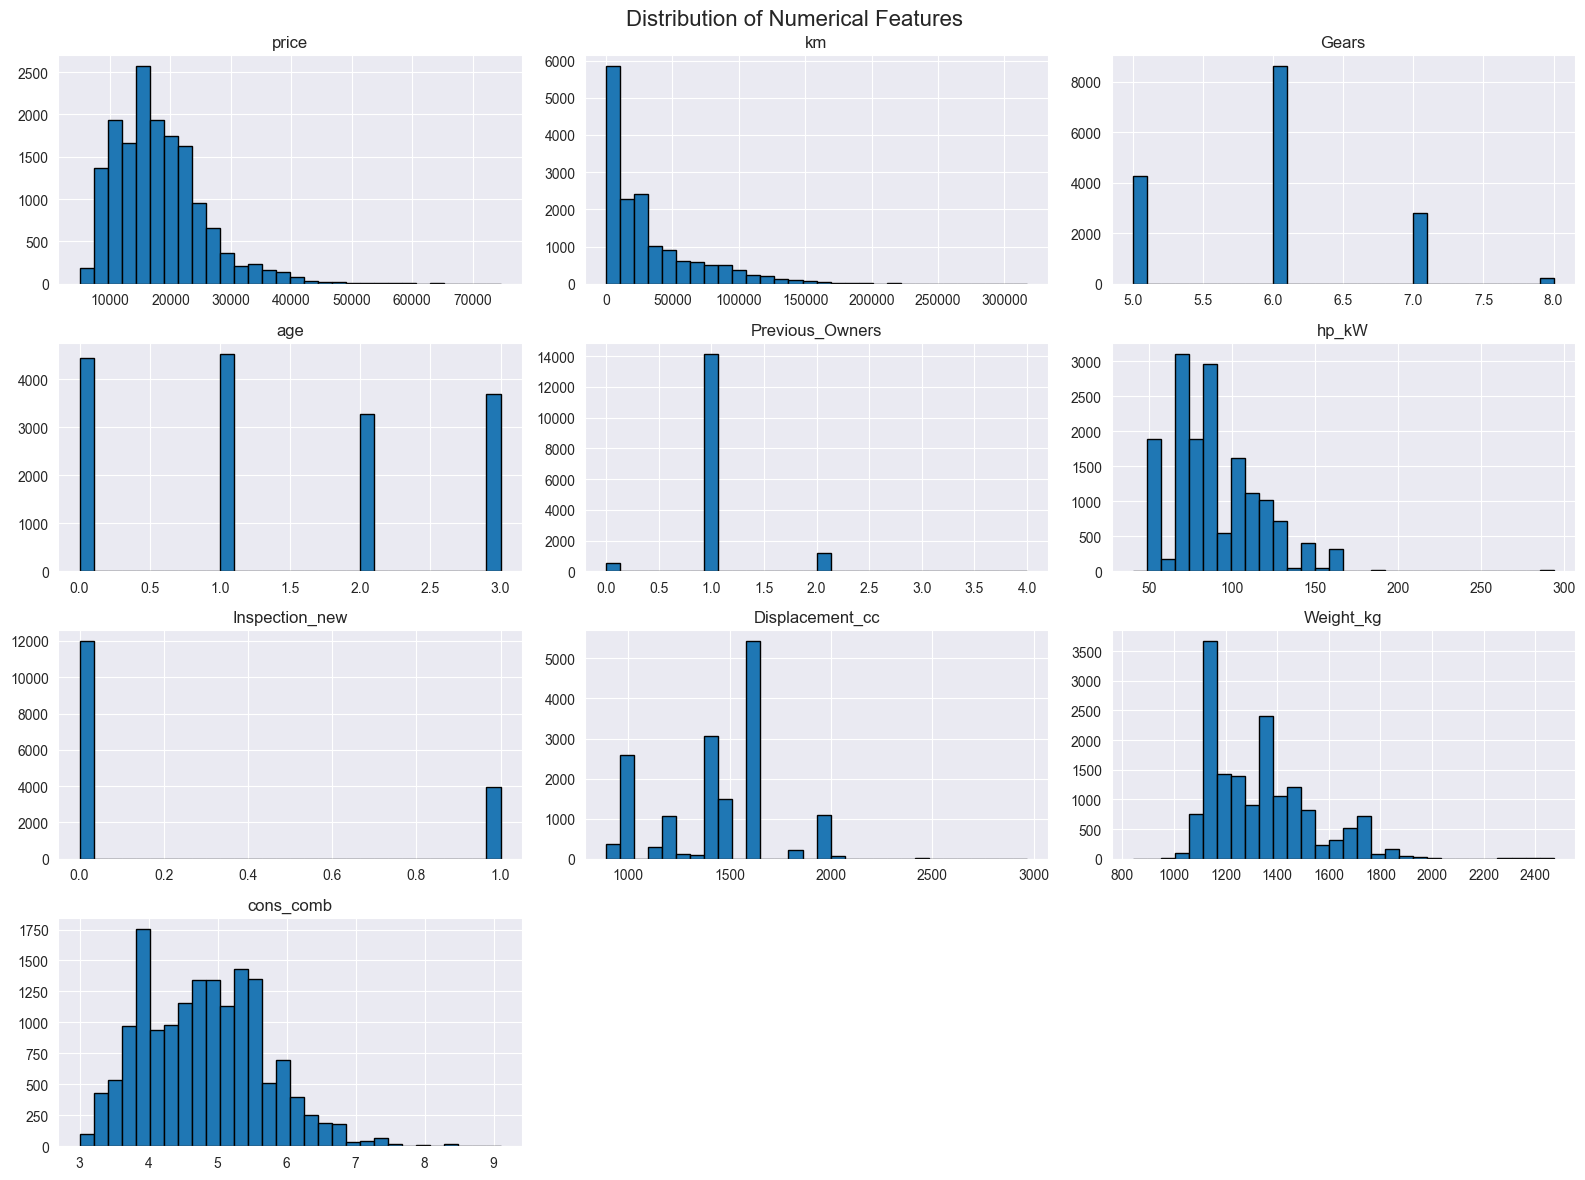

In [124]:
# Identify numerical features and plot histograms

import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:", list(numeric_cols))

df[numeric_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

Categorical predictors: ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']


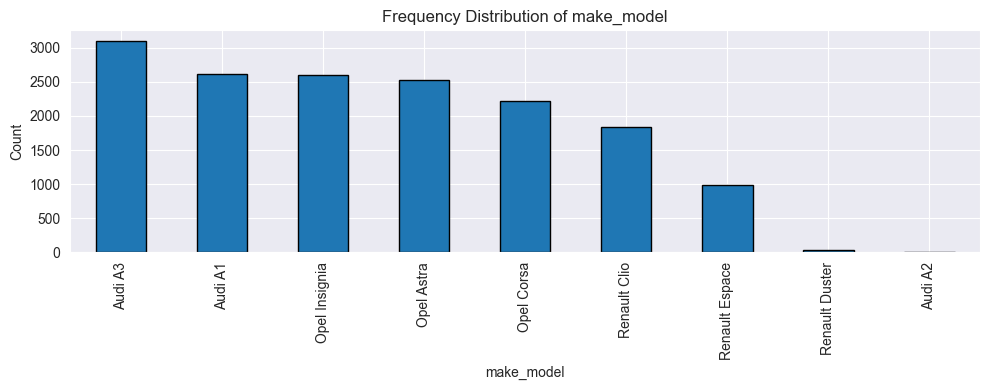

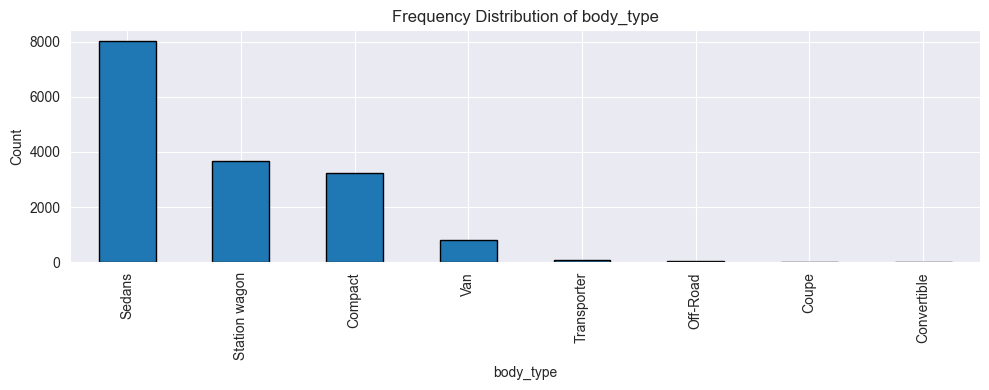

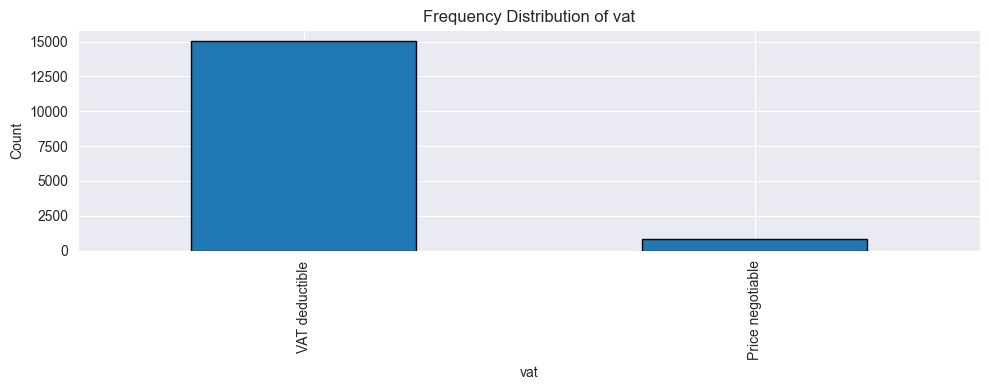

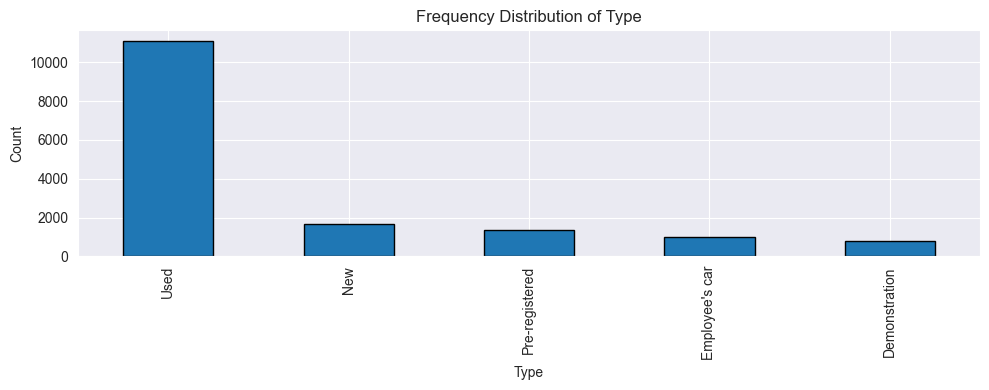

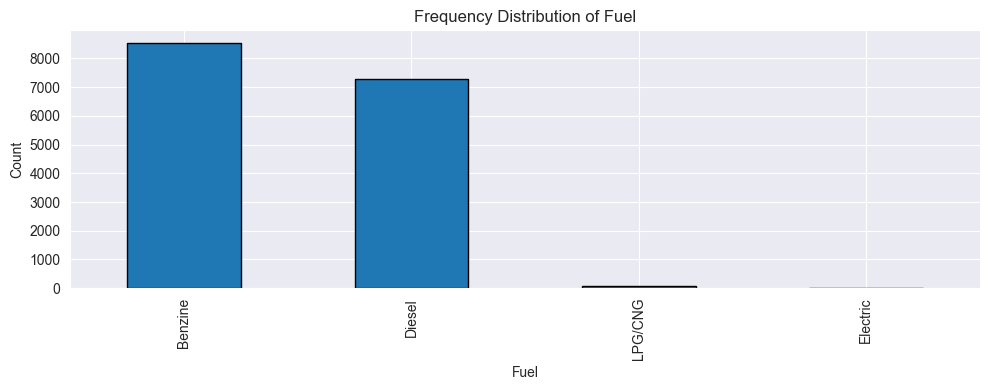

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_66612/2463149345.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


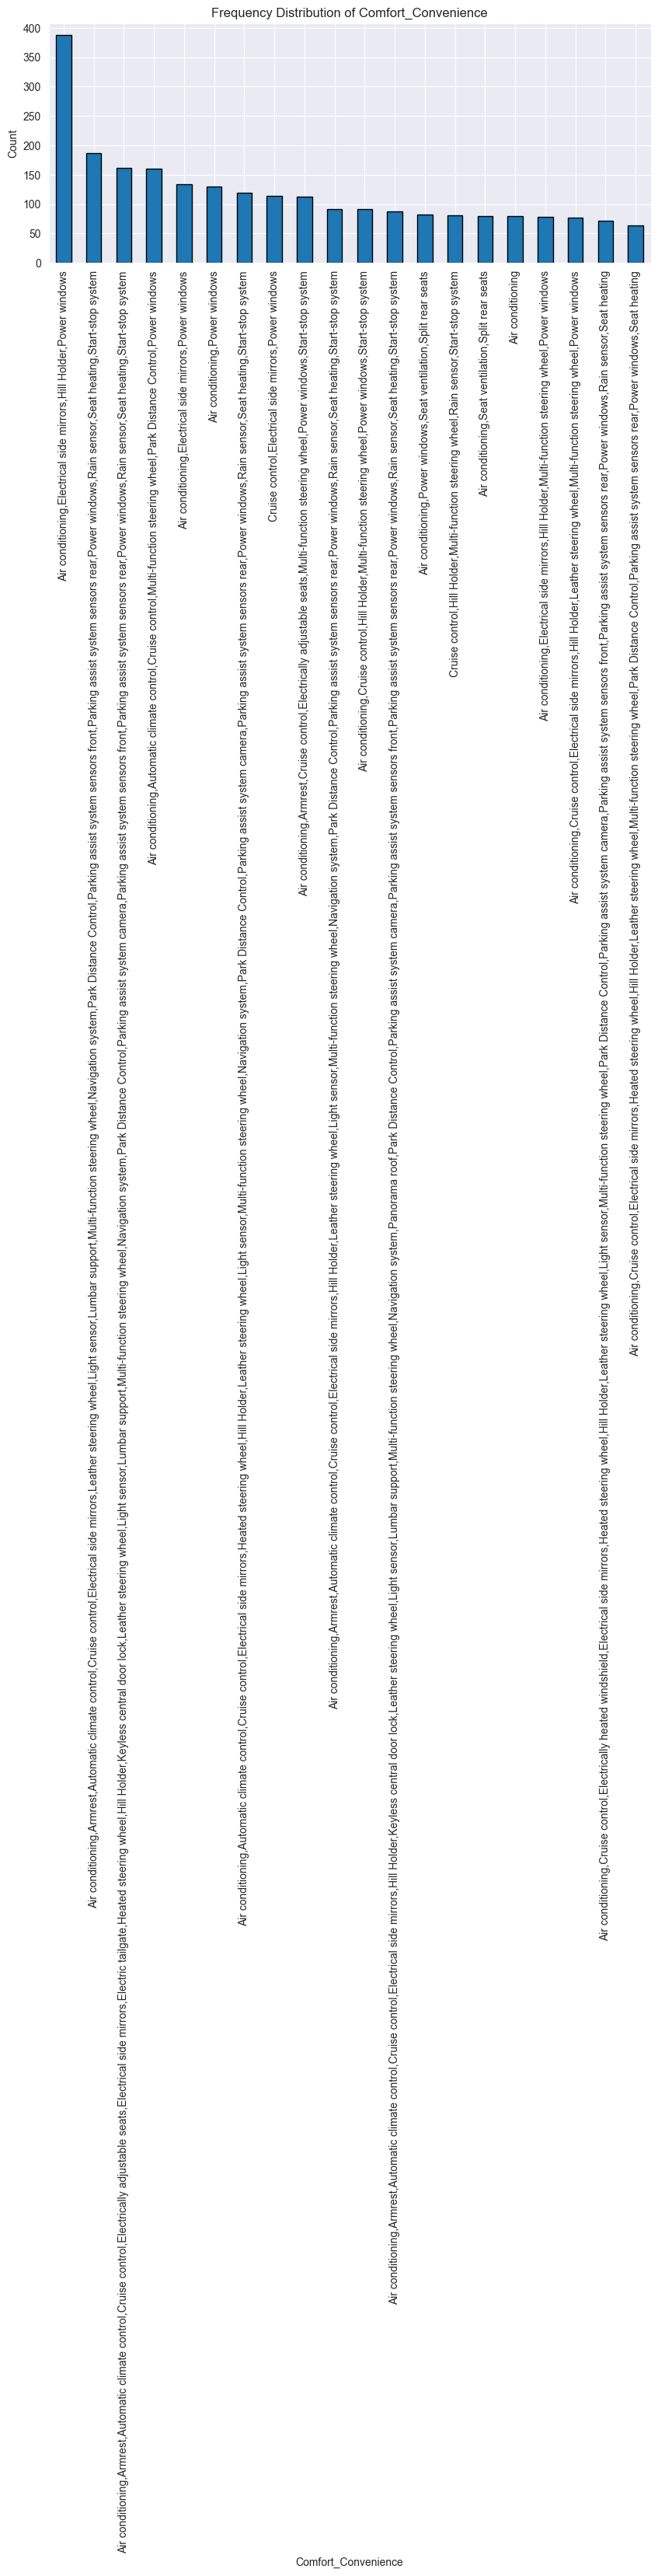

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_66612/2463149345.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


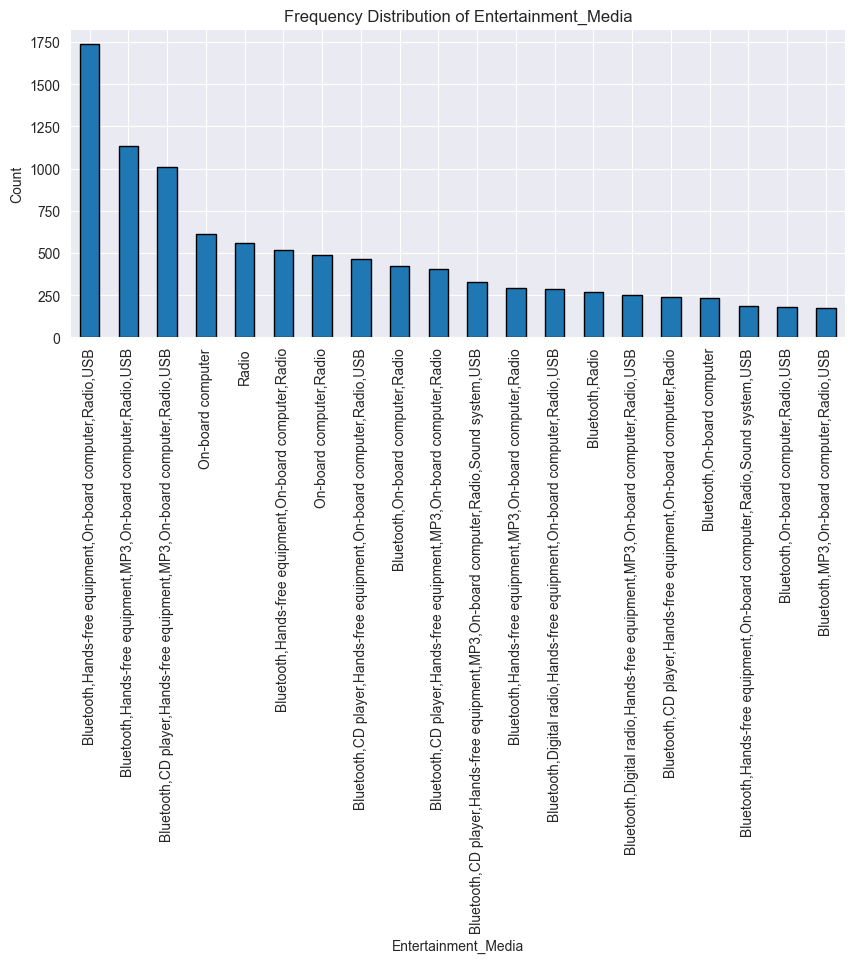

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_66612/2463149345.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


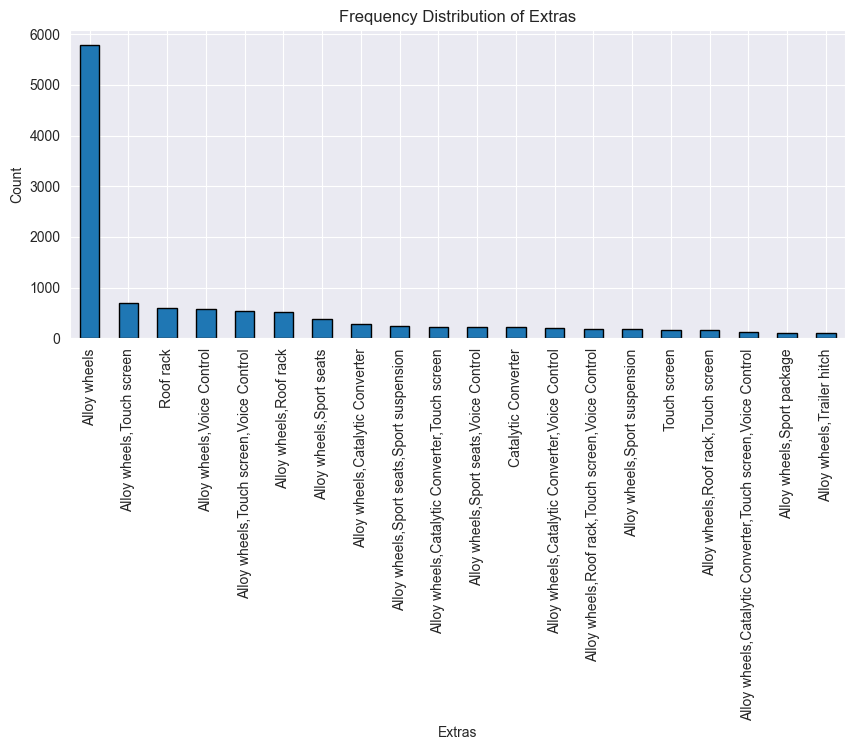

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_66612/2463149345.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


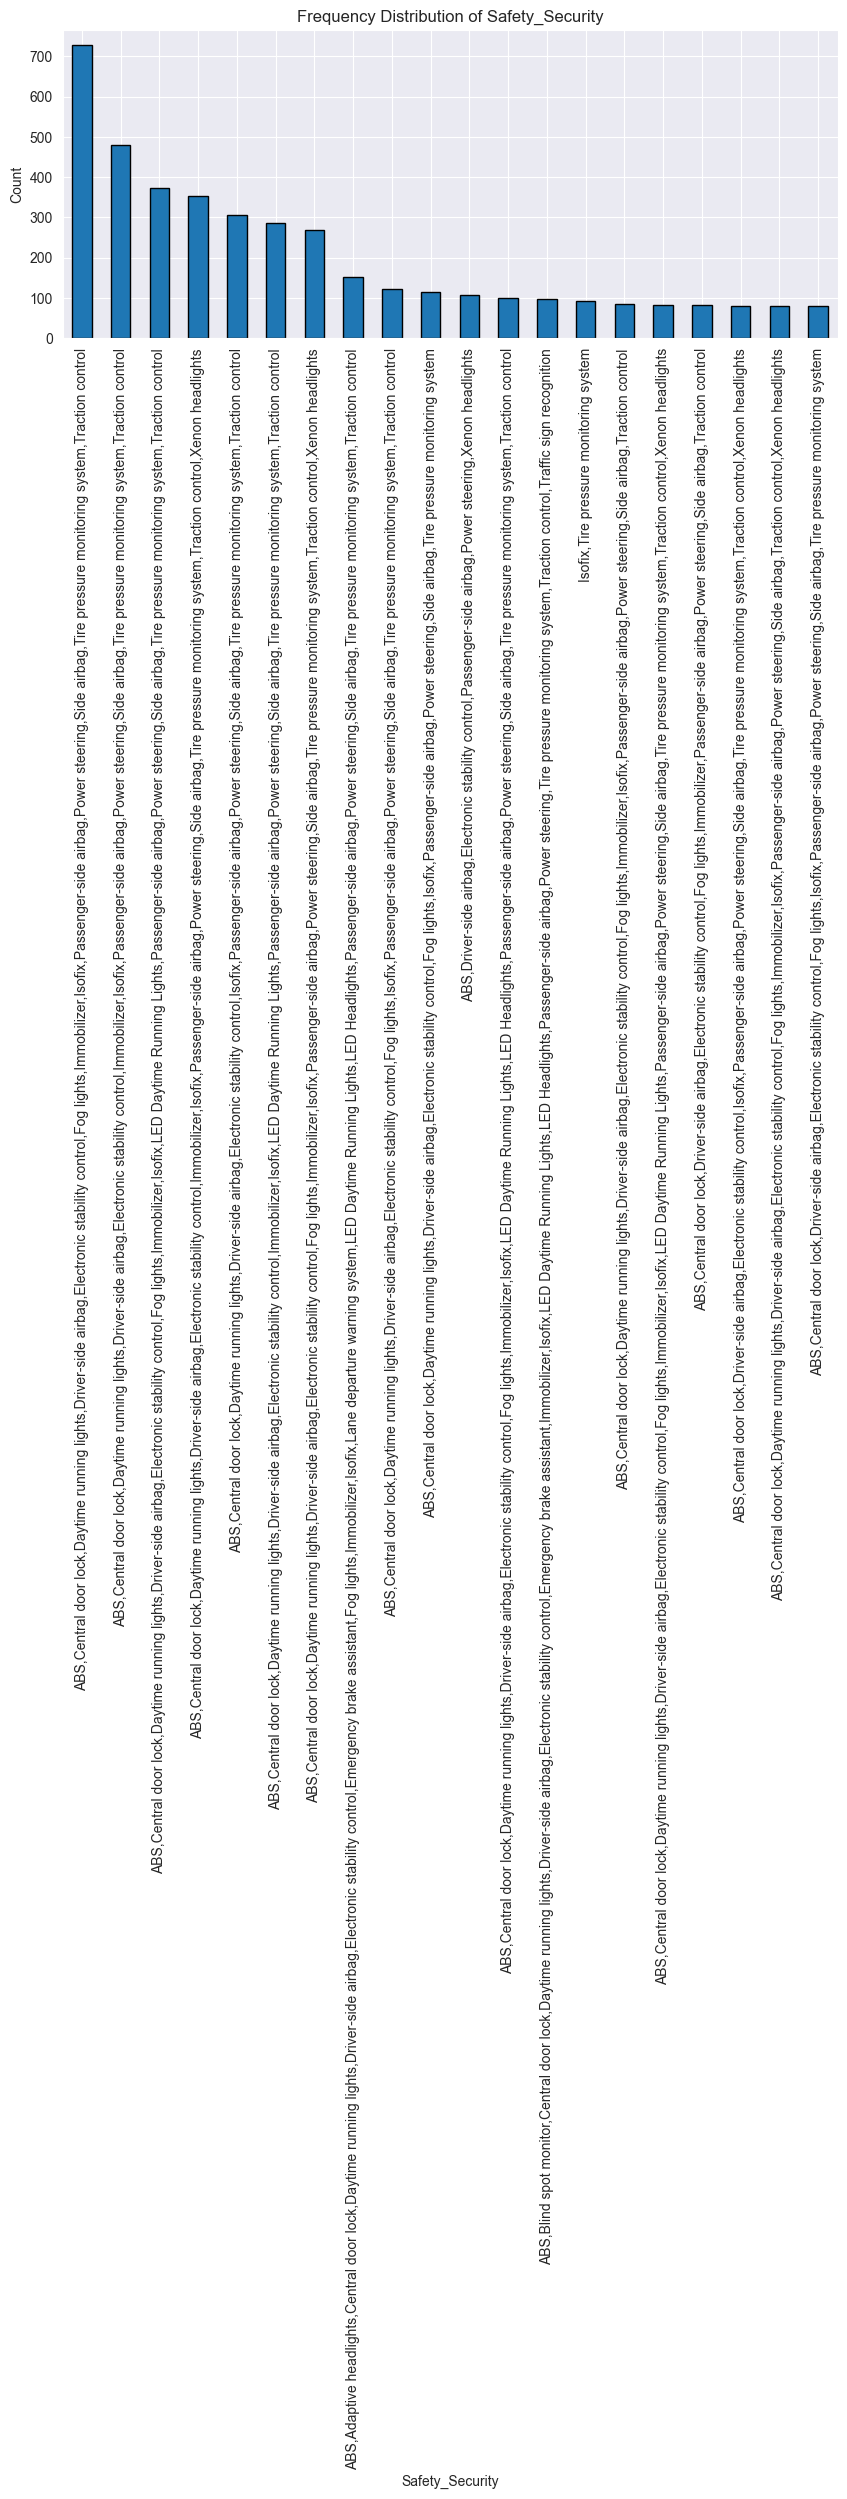

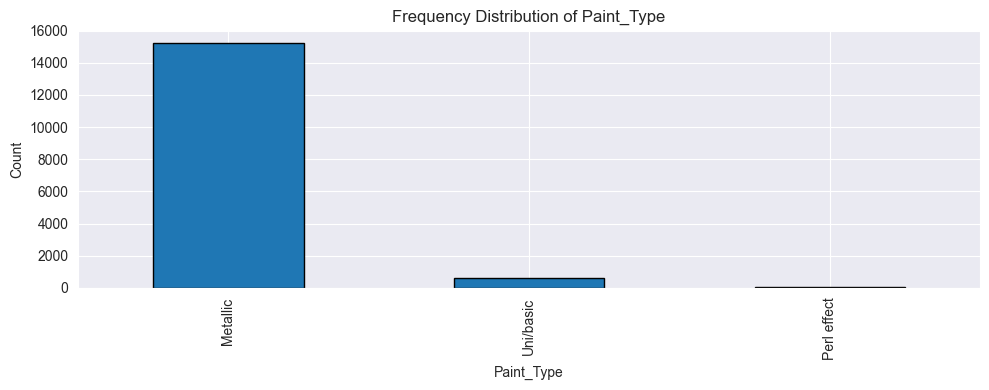

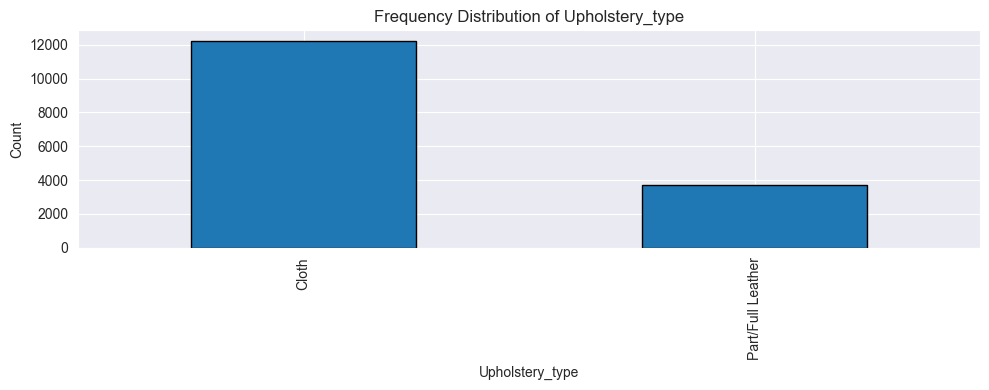

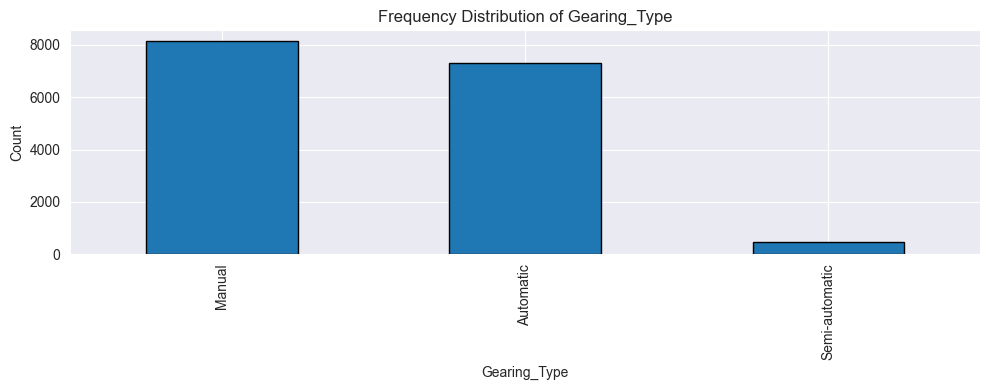

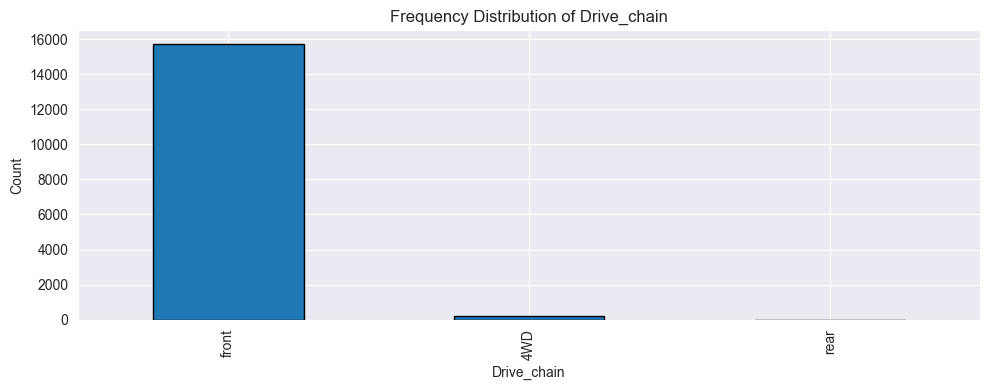

In [125]:
# Identify categorical columns and check their frequency distributions


# Identify categorical predictors
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Columns that should NOT be treated as normal categorical features
multi_label_cols = [
    "Comfort_Convenience",
    "Entertainment_Media",
    "Extras",
    "Safety_Security"
]

# Final categorical predictors
categorical_predictors = [col for col in categorical_cols if col]

print("Categorical predictors:", categorical_predictors)

import matplotlib.pyplot as plt

for col in categorical_predictors:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(20).plot(kind='bar', edgecolor='black')
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [126]:
# Fix columns as needed
# Fixing the 'Type' column based on domain logic
type_map = {
    "Pre-registered": "Nearly_New",
    "New": "Nearly_New",
    "Employee's car": "Nearly_New",
    "Demonstration": "Nearly_New"
}

df["Type"] = df["Type"].replace(type_map)

# Everything else becomes a generic used category
df["Type"] = df["Type"].fillna("Used_Regular")
df["Type"] = df["Type"].apply(lambda x: x if x in ["Nearly_New"] else "Used_Regular")



categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols]

# Function to merge rare categories (<1%) into 'Other'
def merge_rare_categories(series, threshold=0.01):
    freq = series.value_counts(normalize=True)
    rare = freq[freq < threshold].index
    return series.replace(rare, "Other")

# Apply globally
for col in categorical_cols:
    df[col] = merge_rare_categories(df[col])



df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used_Regular,Diesel,7.0,Other,"Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used_Regular,Benzine,7.0,Other,Other,...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used_Regular,Diesel,7.0,Other,Other,...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used_Regular,Diesel,6.0,Other,"Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used_Regular,Diesel,7.0,Other,"Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

Selected target variable: price


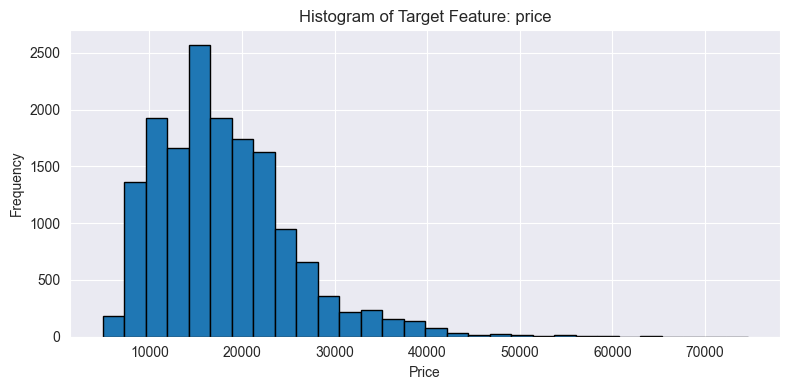

In [127]:
# Plot histograms for target feature
import matplotlib.pyplot as plt


target = "price"   # Explicitly chosen based on dataset + project objective

print("Selected target variable:", target)



if df[target].dtype == "object":
    plt.figure(figsize=(8,4))
    df[target].value_counts().plot(kind="bar", edgecolor="black")
    plt.title(f"Frequency Distribution of Target: {target}")
    plt.xlabel(target)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()



else:
    plt.figure(figsize=(8,4))
    plt.hist(df[target], bins=30, edgecolor="black")
    plt.title(f"Histogram of Target Feature: {target}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


**The target variable seems to be skewed. Perform suitable transformation on the target.**

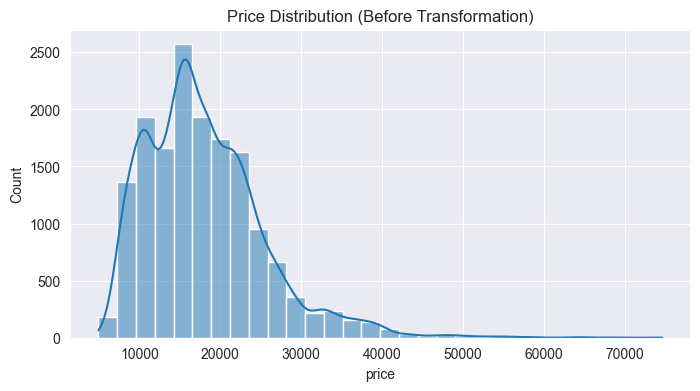

Skewness before transformation: 1.236169412899669
Skewness after log transformation: -0.0314736417467197


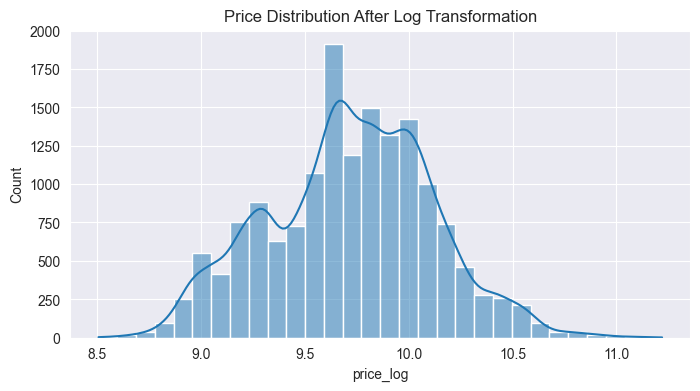

In [128]:
# Transform the target feature

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Price Distribution (Before Transformation)")
plt.show()

print("Skewness before transformation:", df["price"].skew())

# Apply log transformation
df["price_log"] = np.log1p(df["price"])

print("Skewness after log transformation:", df["price_log"].skew())

plt.figure(figsize=(8,4))
sns.histplot(df["price_log"], bins=30, kde=True)
plt.title("Price Distribution After Log Transformation")
plt.show()

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

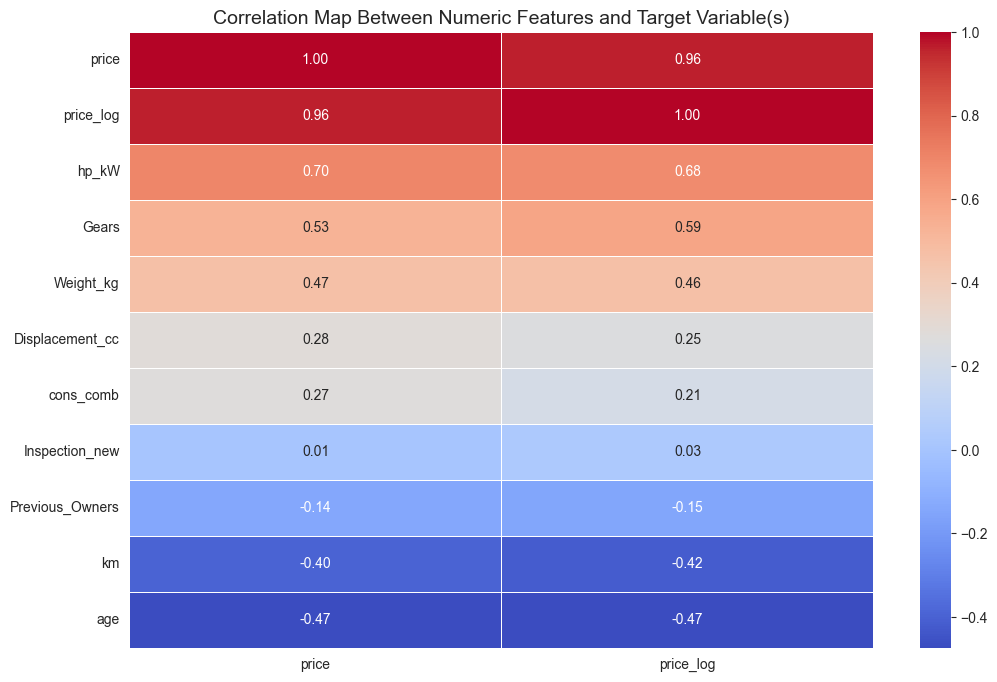

In [129]:
# Visualise correlation
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Include both original and transformed target
targets = ["price"]
if "price_log" in df.columns:
    targets.append("price_log")

corr_matrix = numeric_df[targets + [col for col in numeric_df.columns if col not in targets]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[[target for target in targets]].sort_values(by=targets, ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=.5
)
plt.title("Correlation Map Between Numeric Features and Target Variable(s)", fontsize=14)
plt.show()

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.


===== make_model =====
                   avg_price  avg_price_log  count
make_model                                        
Renault Espace  30080.211907      10.271724    991
Opel Insignia   21463.451886       9.912658   2598
Audi A3         20996.693252       9.928165   3097
Audi A1         18864.688982       9.817643   2614
Opel Astra      15840.834059       9.626041   2525
Other           13657.885714       9.504893     35
Renault Clio    11940.320827       9.335822   1839
Opel Corsa      11061.841606       9.276059   2216

===== body_type =====
                  avg_price  avg_price_log  count
body_type                                        
Van            30789.209302      10.294540    817
Station wagon  18542.296981       9.753456   3677
Sedans         17699.040480       9.716144   8004
Other          17023.604520       9.622932    177
Compact        15076.206481       9.555735   3240

===== vat =====
                     avg_price  avg_price_log  count
vat                    

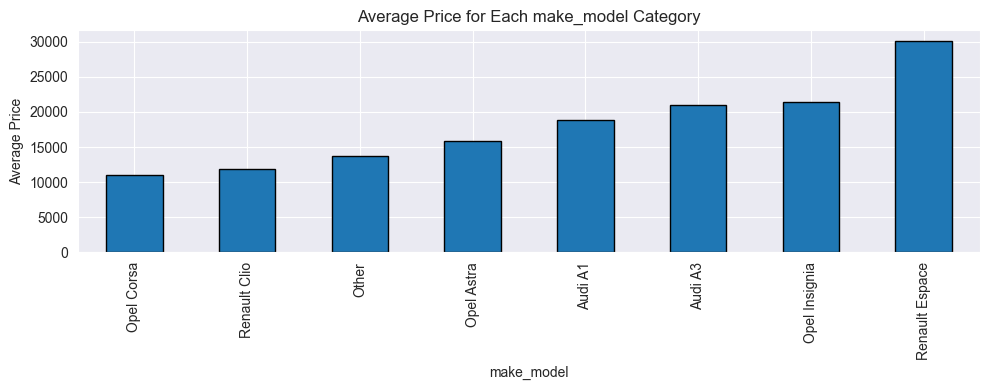

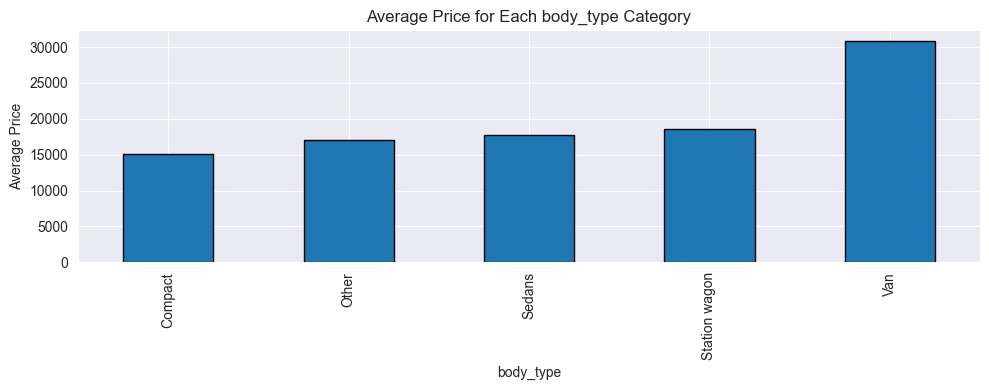

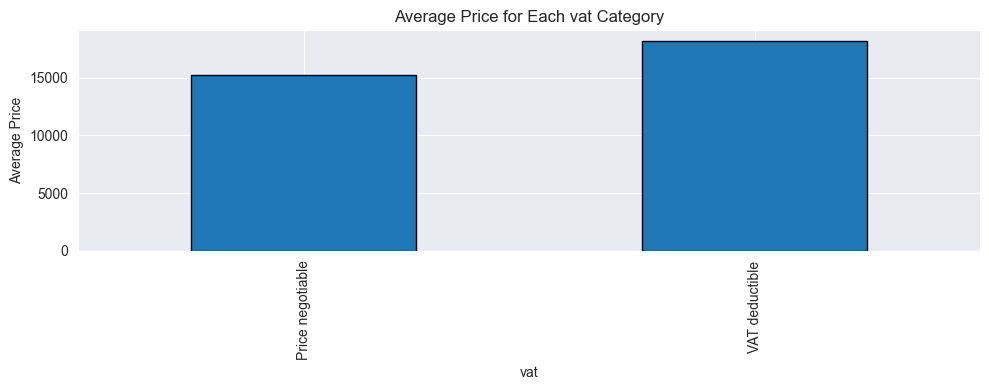

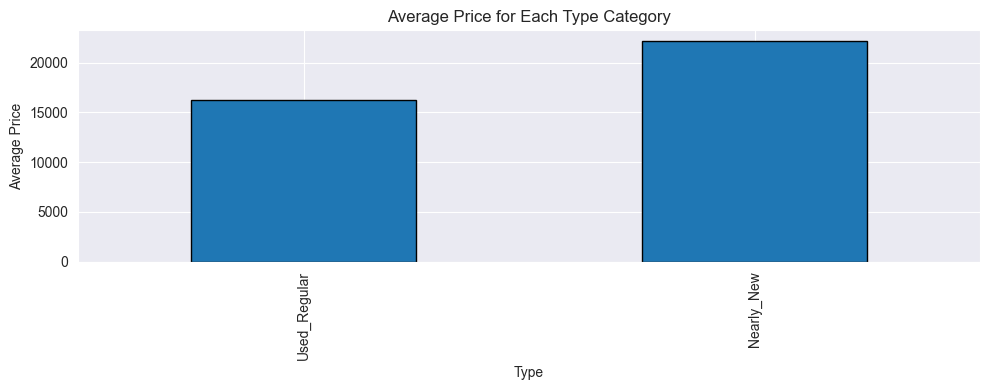

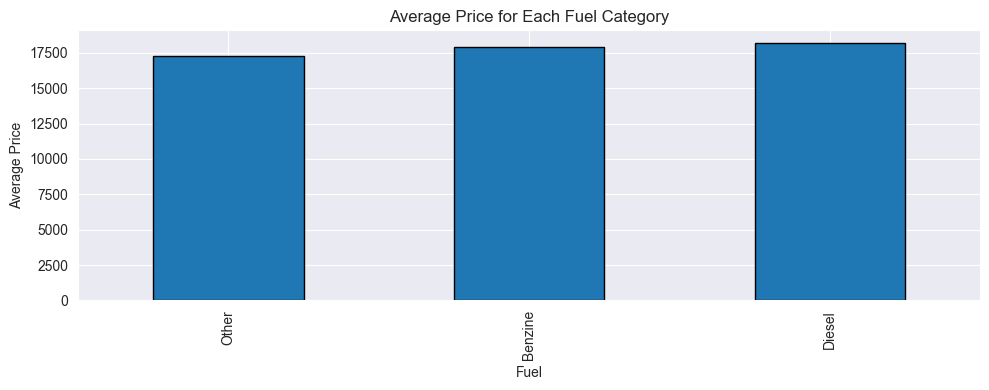

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_66612/1065706893.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


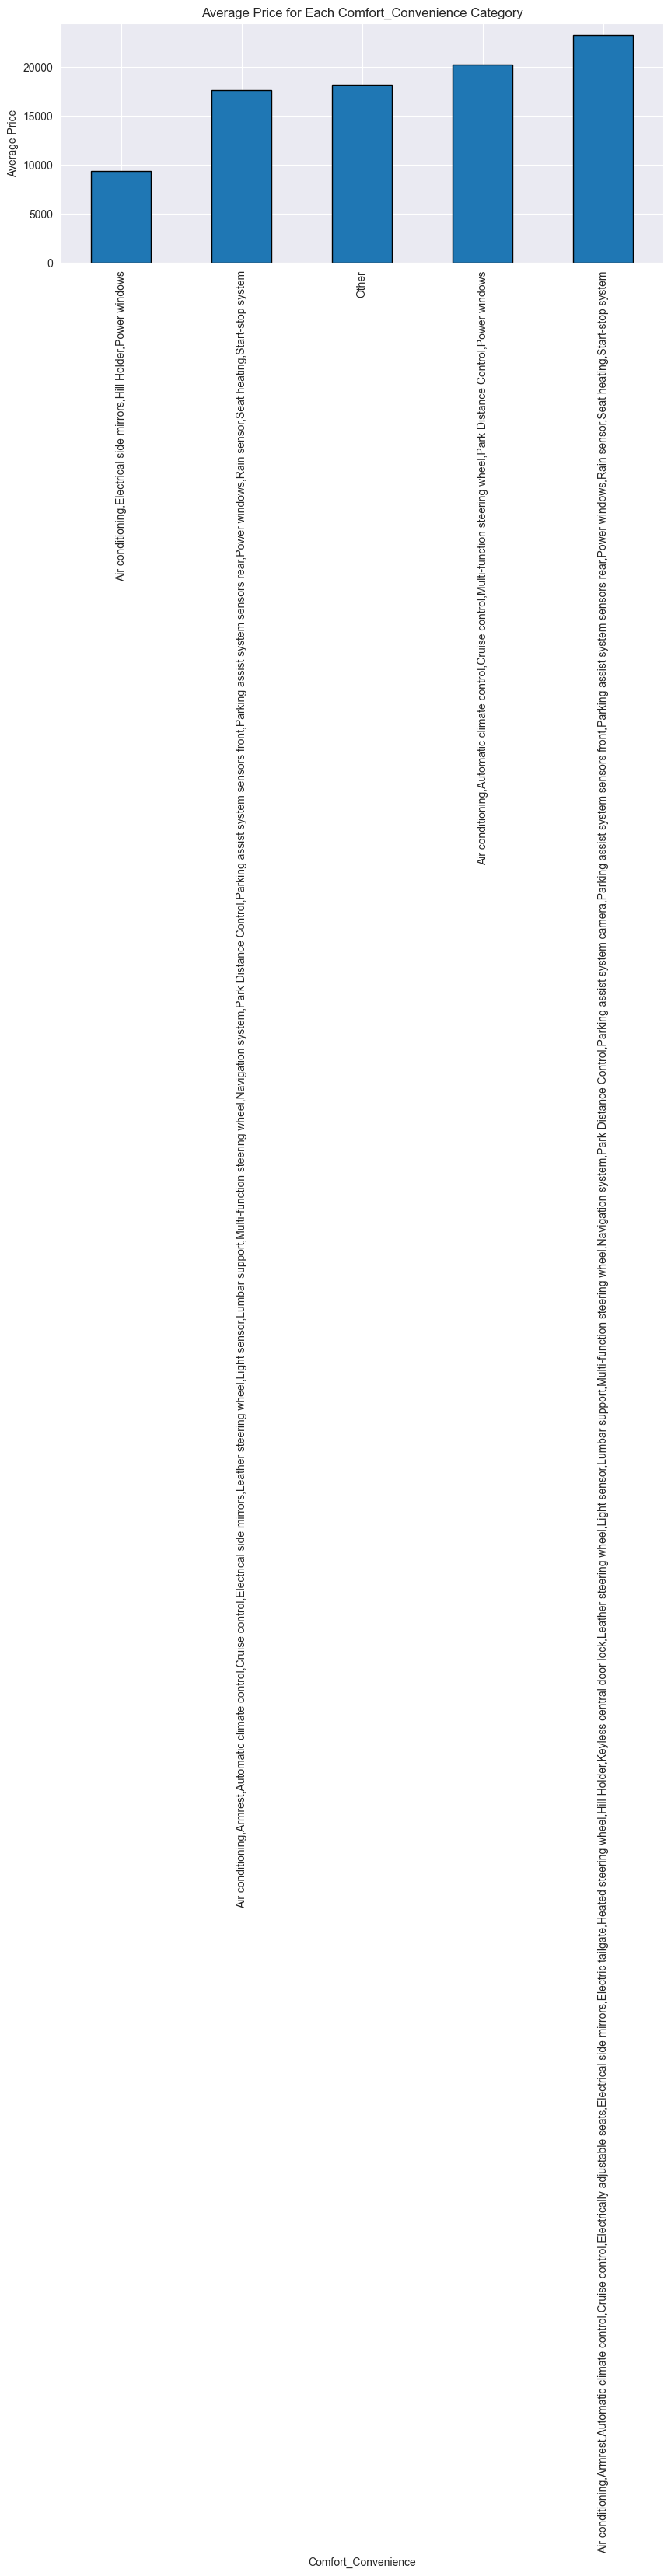

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_66612/1065706893.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


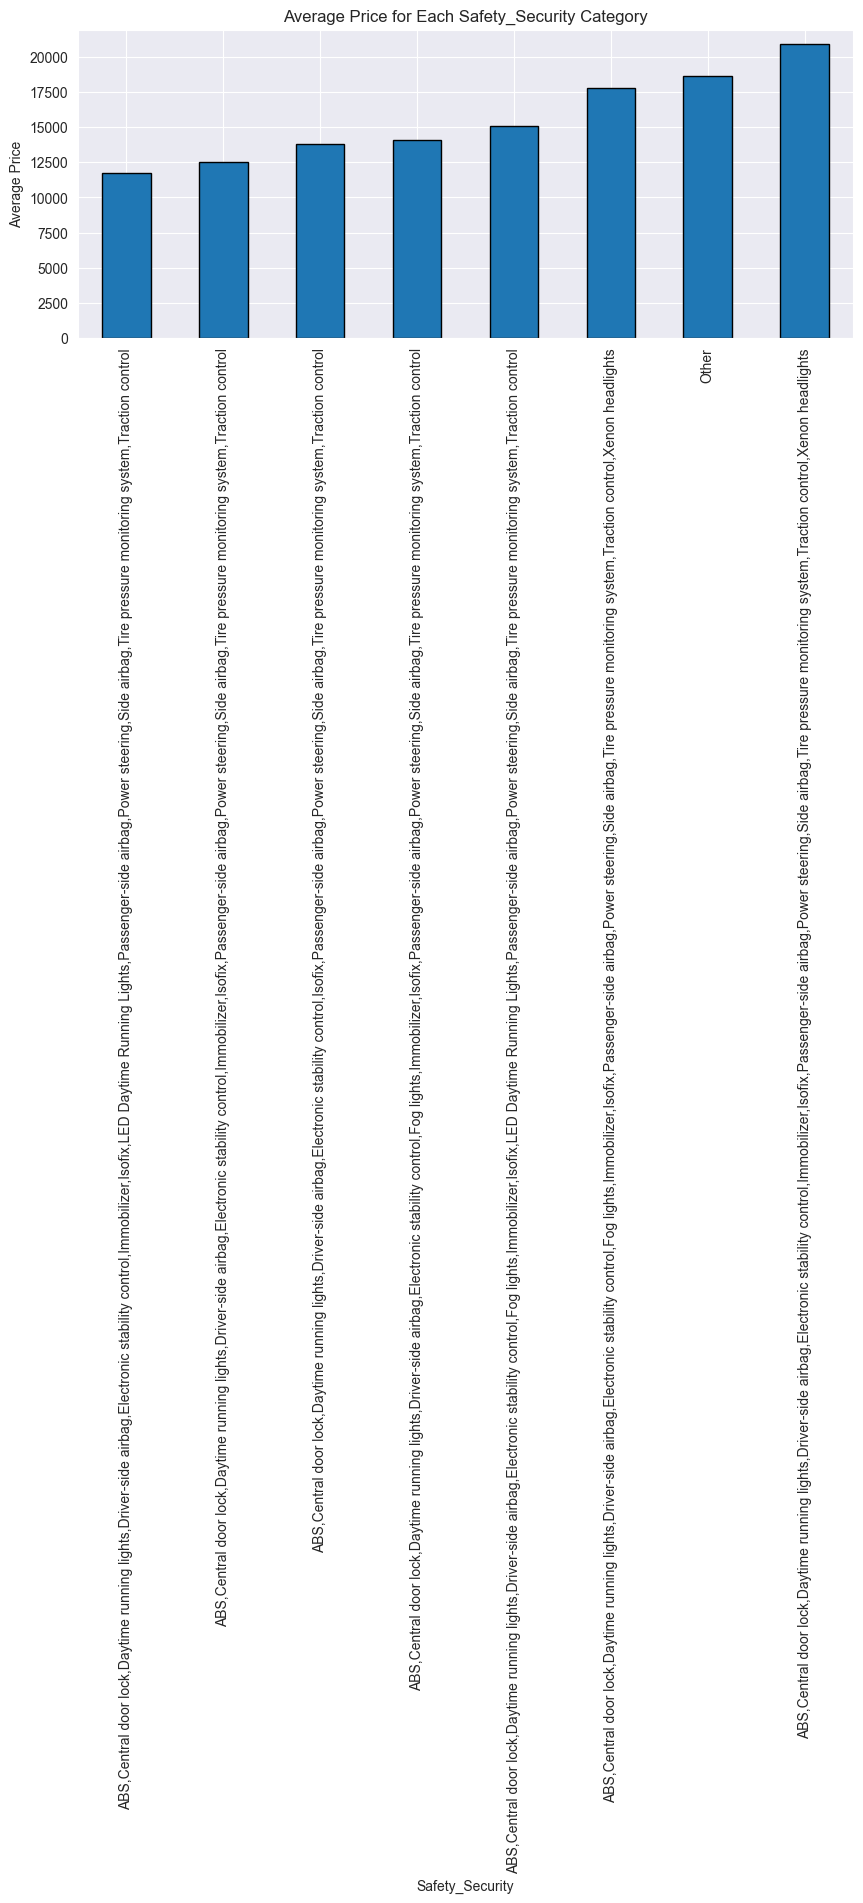

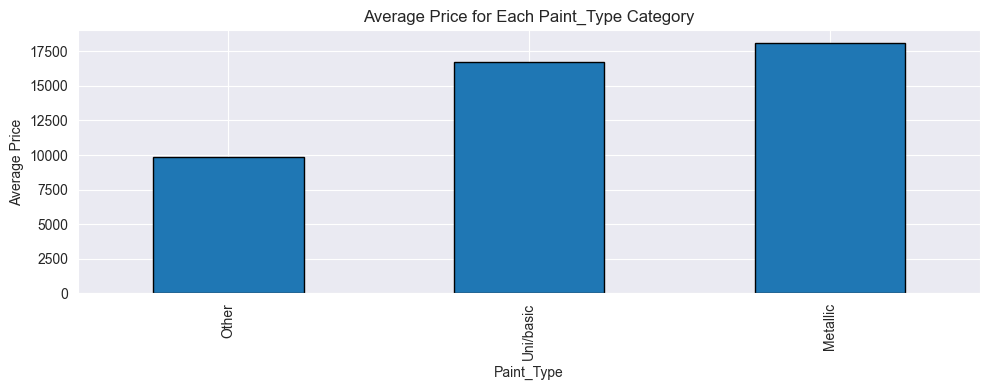

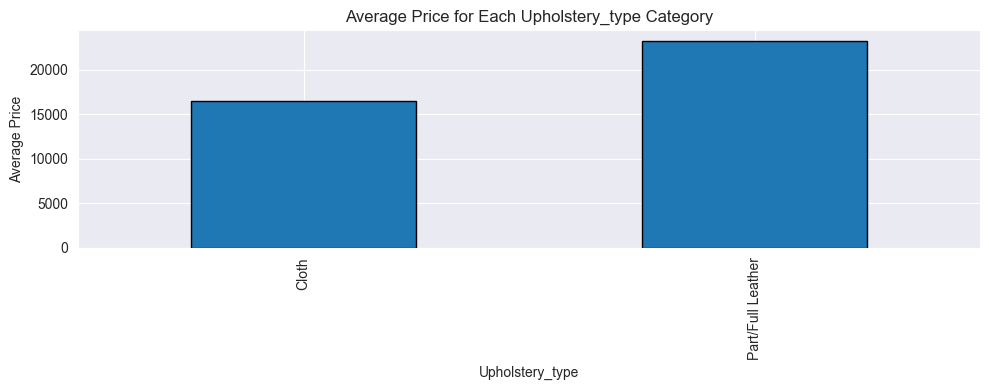

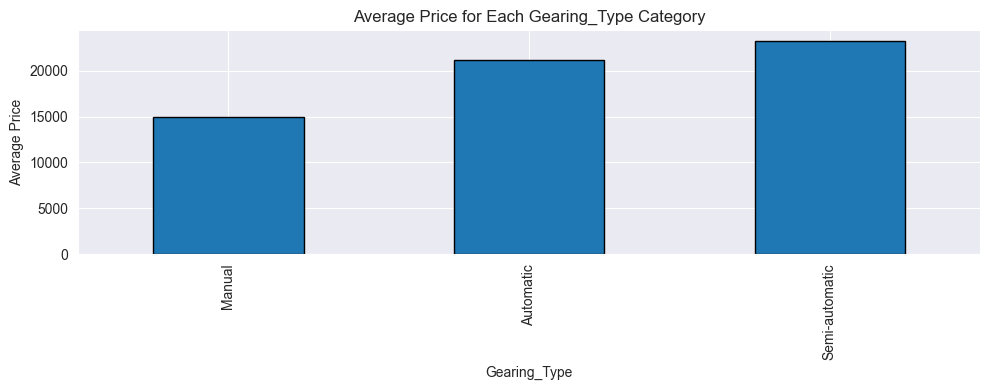

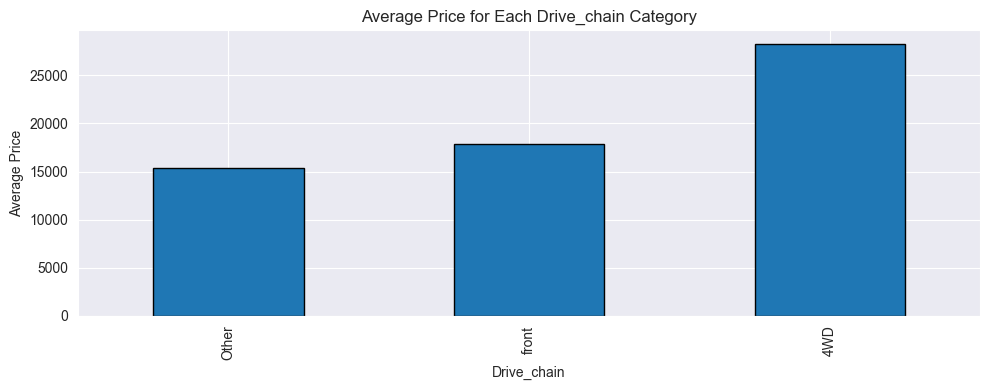

In [130]:
# Comparing average values of target for different categories

category_analysis = {}

for col in categorical_cols:
    summary = df.groupby(col)[["price", "price_log"]].agg(
        avg_price = ("price", "mean"),
        avg_price_log = ("price_log", "mean"),
        count = ("price", "count")
    ).sort_values("avg_price", ascending=False)

    category_analysis[col] = summary
    print(f"\n===== {col} =====")
    print(summary.head(10))
    # show top 10 categories

    import matplotlib.pyplot as plt

for col in categorical_cols:
    if df[col].nunique() <= 15:   # avoid exploding plots
        plt.figure(figsize=(10,4))
        df.groupby(col)["price"].mean().sort_values().plot(kind="bar", edgecolor="black")
        plt.title(f"Average Price for Each {col} Category")
        plt.xlabel(col)
        plt.ylabel("Average Price")
        plt.tight_layout()
        plt.show()

### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

Outlier counts per numeric column:
price: 479
km: 689
Gears: 225
age: 0
Previous_Owners: 1757
hp_kW: 361
Inspection_new: 3932
Displacement_cc: 21
Weight_kg: 87
cons_comb: 125
price_log: 71


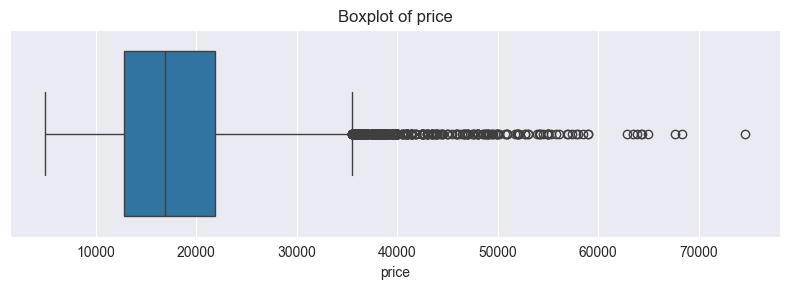

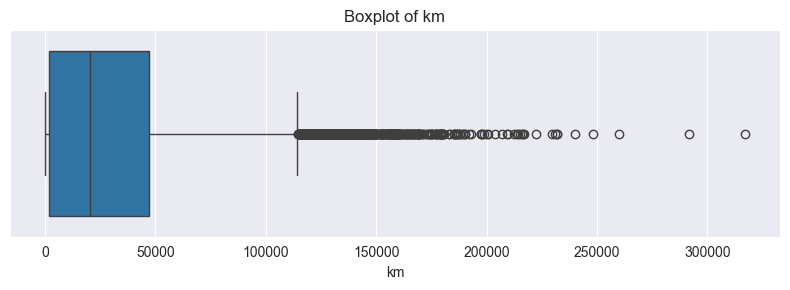

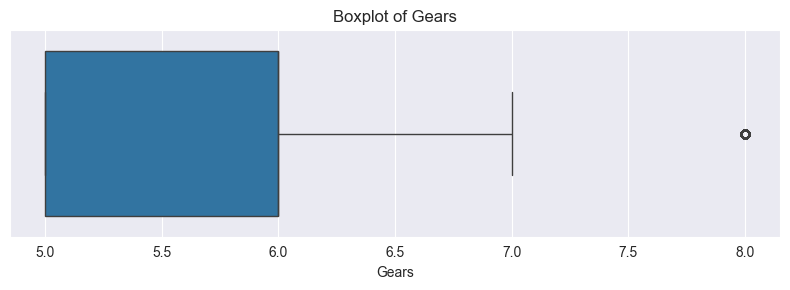

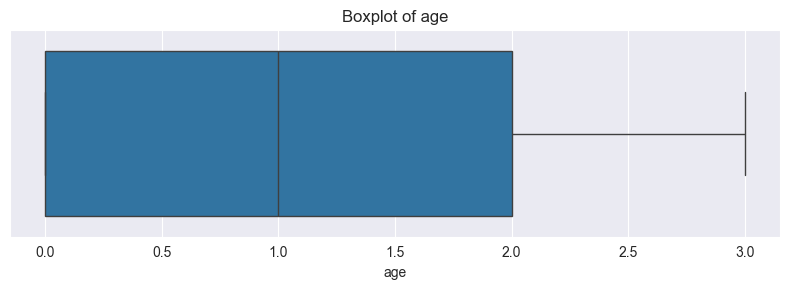

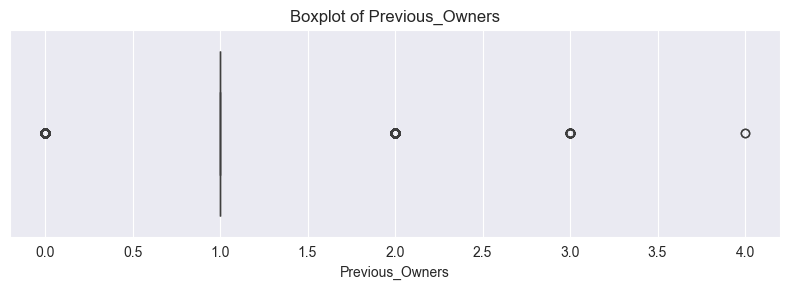

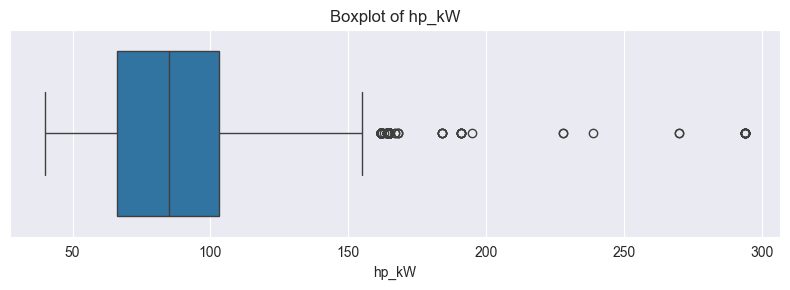

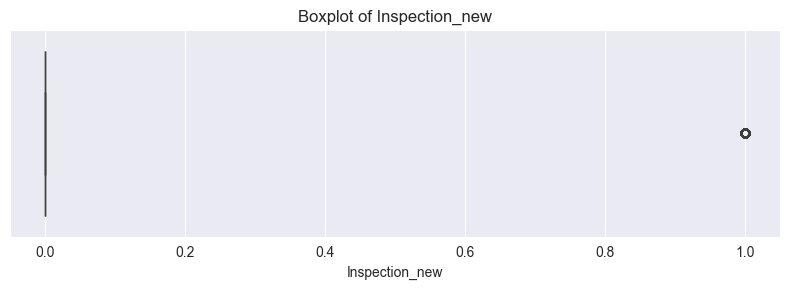

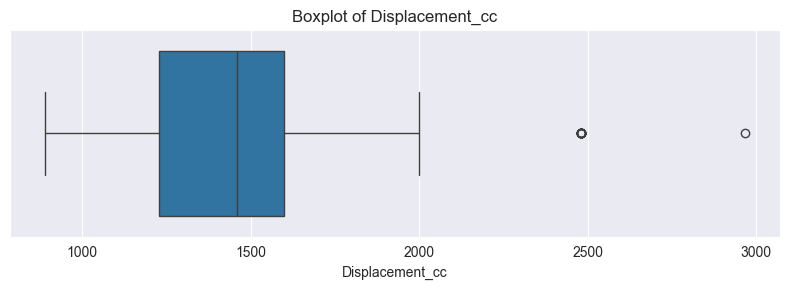

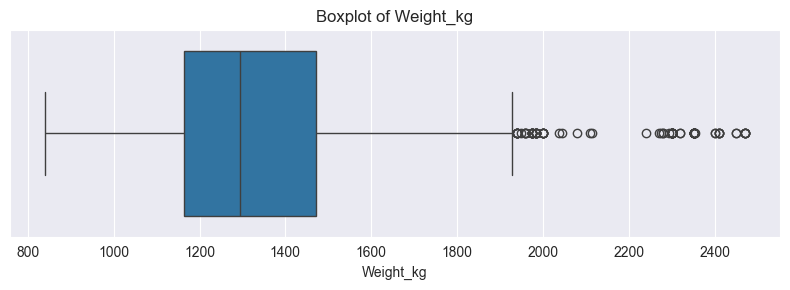

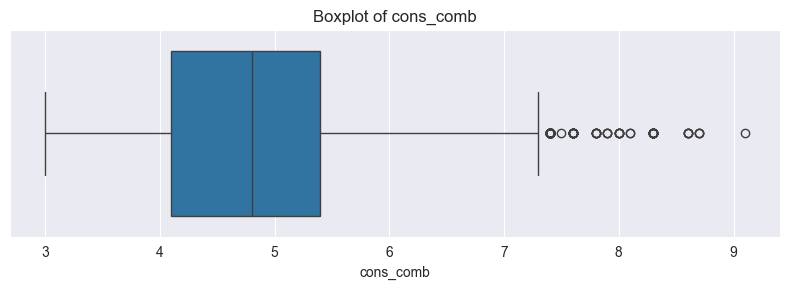

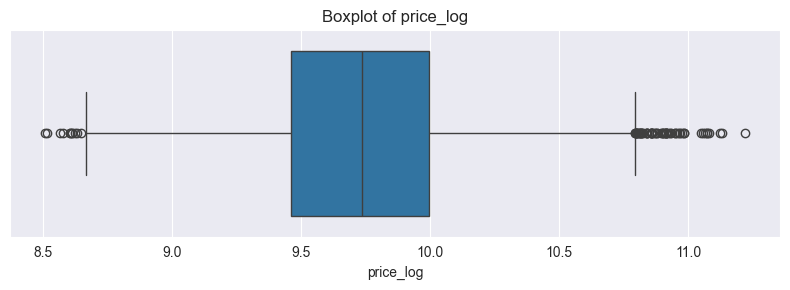

In [131]:
# Outliers present in each column
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = len(outliers)

# Print summary
print("Outlier counts per numeric column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.


Outliers remaining after winsorization:
price              221
km                 297
Gears                0
age                  0
Previous_Owners    554
hp_kW                0
Inspection_new       0
Displacement_cc      0
Weight_kg            0
cons_comb            0
price_log           22
dtype: int64


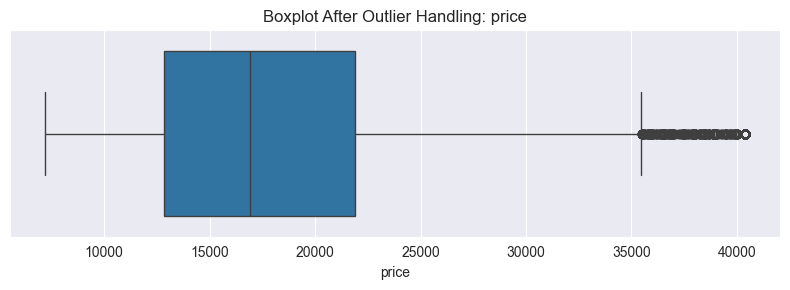

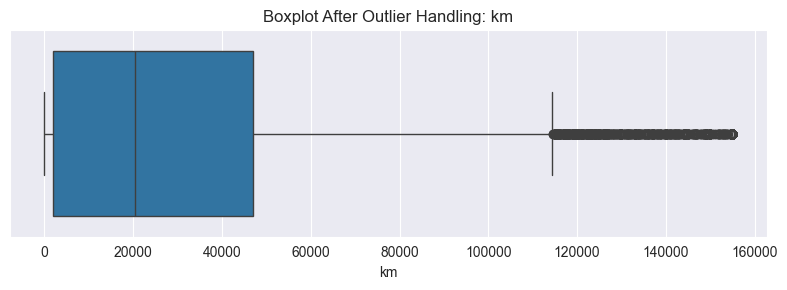

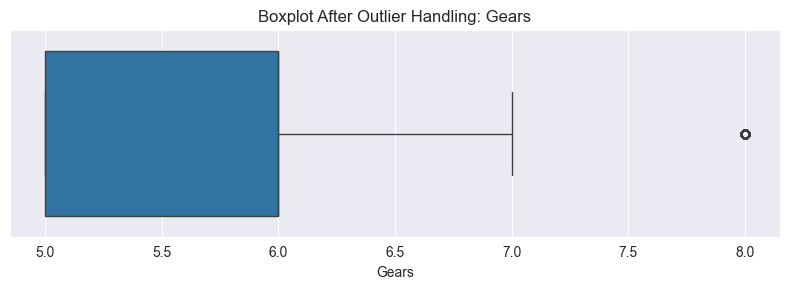

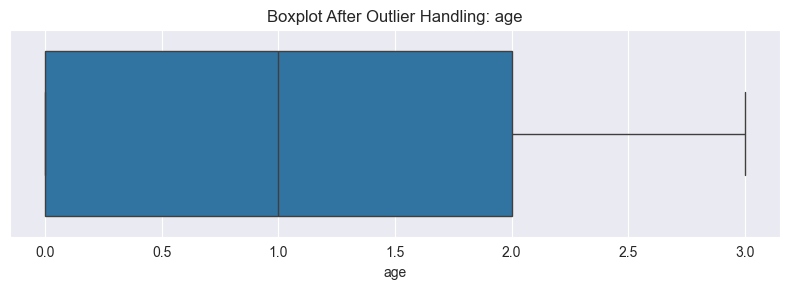

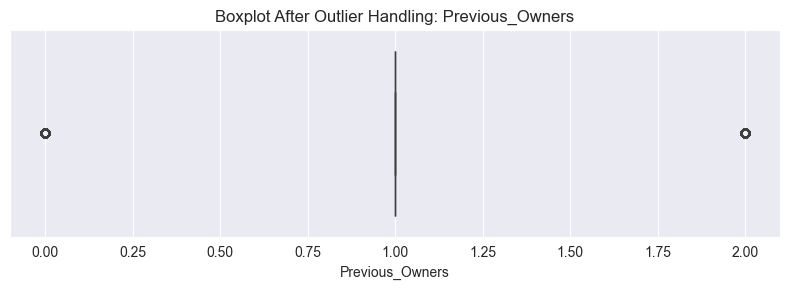

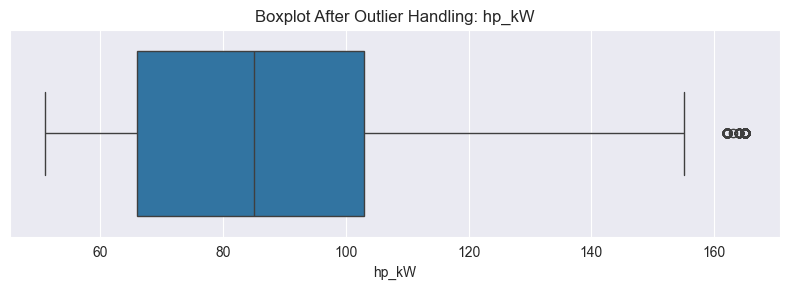

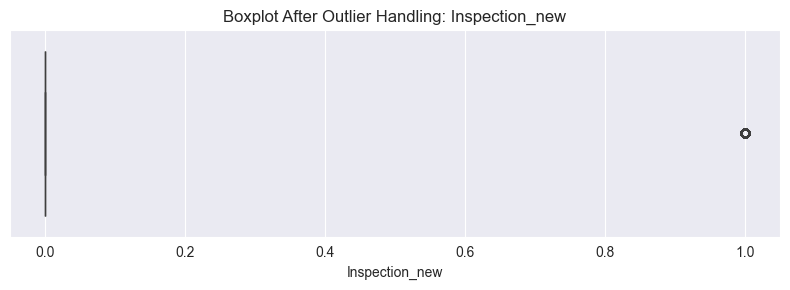

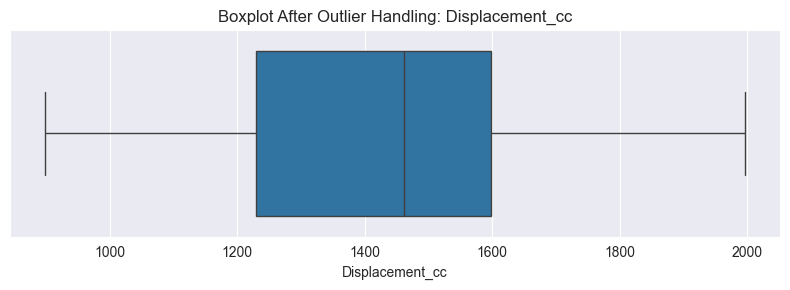

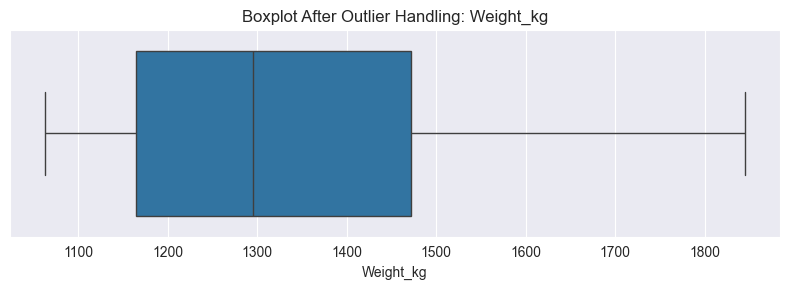

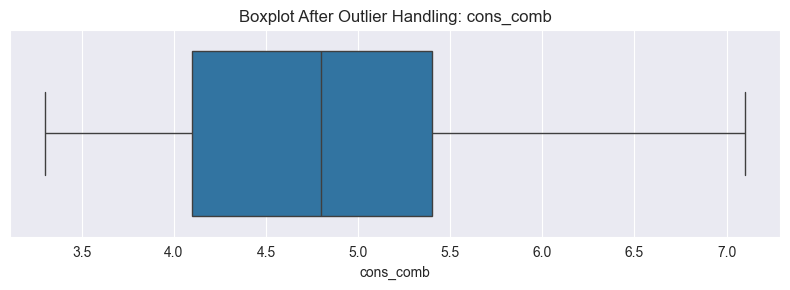

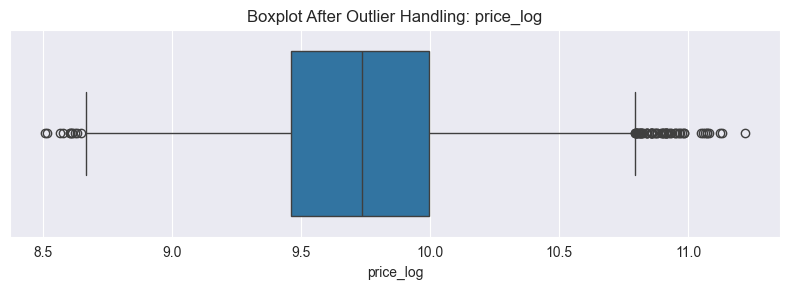

In [132]:
# Handle outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

def winsorize(series, lower=0.01, upper=0.99):
    lower_bound = series.quantile(lower)
    upper_bound = series.quantile(upper)
    return series.clip(lower_bound, upper_bound)

numeric_cols_to_cap = [col for col in numeric_cols if col not in ["price_log"]]

for col in numeric_cols_to_cap:
    df[col] = winsorize(df[col])

from scipy.stats import zscore

outliers_post = (abs(df[numeric_cols].apply(zscore)) > 3).sum()
print("\nOutliers remaining after winsorization:")
print(outliers_post)

import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot After Outlier Handling: {col}")
    plt.tight_layout()
    plt.show()

### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [133]:
# Fix/create columns as needed



#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [134]:
# Check unique values in each feature spec column
spec_cols = ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']

for col in spec_cols:
    print(f"\n--- Unique sample values from {col} ---")
    print(df[col].dropna().astype(str).head(10))

def split_features(x):
    if pd.isna(x):
        return []
    return [f.strip().lower() for f in str(x).split(",") if f.strip() != ""]

for col in spec_cols:
    df[col + "_list"] = df[col].apply(split_features)

from collections import Counter

feature_counts = {}

for col in spec_cols:
    counter = Counter()
    df[col + "_list"].apply(lambda items: counter.update(items))
    feature_counts[col] = counter

for col, counter in feature_counts.items():
    print(f"\n===== Feature Frequencies in {col} =====")
    freq_df = pd.DataFrame(counter.items(), columns=["feature", "count"]).sort_values("count", ascending=False)
    print(freq_df.head(20))

    N = len(df)
LOWER = 0.05 * N
UPPER = 0.40 * N

selected_features = {}

for col, counter in feature_counts.items():
    selected = [feat for feat, cnt in counter.items() if LOWER <= cnt <= UPPER]
    selected_features[col] = selected
    print(f"\nSelected features from {col}:")
    print(selected)# top 20

for col, feats in selected_features.items():
    for feat in feats:
        new_col = f"{col}_{feat}".replace(" ", "_")
        df[new_col] = df[col + "_list"].apply(lambda x: 1 if feat in x else 0)


--- Unique sample values from Comfort_Convenience ---
0                                                Other
1                                                Other
2                                                Other
3                                                Other
4                                                Other
5                                                Other
6                                                Other
7                                                Other
8                                                Other
9    Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, dtype: object

--- Unique sample values from Entertainment_Media ---
0    Bluetooth,Hands-free equipment,On-board comput...
1                                                Other
2                                                Other
3    Bluetooth,CD player,Hands-free equipment,MP3,O...
4    Bluetooth,CD player,Hands-free equipment,MP3,O...
5    Bluetooth,Hands-fre

Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [135]:
# Drop features from df
df.drop(columns=spec_cols + [col + "_list" for col in spec_cols], inplace=True)
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,...,Safety_Security_driver-side_airbag,Safety_Security_electronic_stability_control,Safety_Security_fog_lights,Safety_Security_immobilizer,Safety_Security_isofix,Safety_Security_passenger-side_airbag,Safety_Security_power_steering,Safety_Security_side_airbag,Safety_Security_tire_pressure_monitoring_system,Safety_Security_traction_control
0,Audi A1,Sedans,15770.0,VAT deductible,56013.0,Used_Regular,Diesel,7.0,3.0,2.0,...,1,1,1,1,1,1,1,1,1,1
1,Audi A1,Sedans,14500.0,Price negotiable,80000.0,Used_Regular,Benzine,7.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,Audi A1,Sedans,14640.0,VAT deductible,83450.0,Used_Regular,Diesel,7.0,3.0,1.0,...,1,1,0,1,1,1,1,1,1,1
3,Audi A1,Sedans,14500.0,VAT deductible,73000.0,Used_Regular,Diesel,6.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,Audi A1,Sedans,16790.0,VAT deductible,16200.0,Used_Regular,Diesel,7.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


all_cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()


all_cat_cols = [c for c in all_cat_cols if c not in ["price", "price_log"]]


numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Remove target
numeric_cols = [c for c in numeric_cols if c not in ["price", "price_log"]]


CARDINALITY_LIMIT = 10  # <=10 → OneHot; >10 → Frequency Encoding

low_card_cols = [c for c in all_cat_cols if df[c].nunique() <= CARDINALITY_LIMIT]
high_card_cols = [c for c in all_cat_cols if df[c].nunique() > CARDINALITY_LIMIT]

print("Low-cardinality columns:", low_card_cols)
print("High-cardinality columns:", high_card_cols)


N = len(df)
for col in high_card_cols:
    freq = df[col].value_counts(dropna=False) / N
    df[col + "_freq"] = df[col].map(freq).fillna(0)


df.drop(columns=high_card_cols, inplace=True)



from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

ohe_array = ohe.fit_transform(df[low_card_cols])
ohe_cols = ohe.get_feature_names_out(low_card_cols)

df_ohe = pd.DataFrame(ohe_array, columns=ohe_cols, index=df.index)

# Drop original low-card categorical columns
df.drop(columns=low_card_cols, inplace=True)

df_encoded = pd.concat([df, df_ohe], axis=1)

print("Final encoded dataframe shape:", df_encoded.shape)
df_encoded.head()


df_encoded = pd.concat([df, df_ohe], axis=1)

print("Final encoded dataframe shape:", df_encoded.shape)

df_encoded.head()

Low-cardinality columns: ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']
High-cardinality columns: []
Final encoded dataframe shape: (15915, 67)
Final encoded dataframe shape: (15915, 67)


,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Paint_Type_Other,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_Other,Drive_chain_front
0,15770.0,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,14500.0,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,14640.0,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,14500.0,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,16790.0,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [137]:
# Split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Ensure 'price_log' exists — create it if missing
if "price_log" not in df.columns and "price_log" not in df_encoded.columns:
    df["price_log"] = np.log1p(df["price"])    # safe log transform
    print("price_log created successfully.")

# If df_encoded exists but doesn't have price_log, add it
if "price_log" not in df_encoded.columns:
    df_encoded["price_log"] = np.log1p(df_encoded["price"])
    print("price_log added to df_encoded.")

X = df_encoded.drop(columns=["price", "price_log"], errors='ignore')
y = df_encoded["price_log"]  # using the transformed target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train shape:", X_train.shape)
print("Test  shape:", X_test.shape)



Train shape: (12732, 65)
Test  shape: (3183, 65)


#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [138]:
# Scale features

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numeric columns to scale:", numeric_cols)


scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])


X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Scaling completed successfully.")


Numeric columns to scale: ['km', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb', 'Comfort_Convenience_air_conditioning', 'Comfort_Convenience_power_windows', 'Entertainment_Media_other', 'Entertainment_Media_cd_player', 'Entertainment_Media_mp3', 'Entertainment_Media_usb', 'Extras_catalytic_converter', 'Extras_voice_control', 'Extras_other', 'Extras_sport_seats', 'Extras_touch_screen', 'Extras_roof_rack', 'Safety_Security_abs', 'Safety_Security_central_door_lock', 'Safety_Security_daytime_running_lights', 'Safety_Security_driver-side_airbag', 'Safety_Security_electronic_stability_control', 'Safety_Security_fog_lights', 'Safety_Security_immobilizer', 'Safety_Security_isofix', 'Safety_Security_passenger-side_airbag', 'Safety_Security_power_steering', 'Safety_Security_side_airbag', 'Safety_Security_tire_pressure_monitoring_system', 'Safety_Security_traction_control', 'make_model_Audi A1', 'make_model_Audi A3', 'make_model_Opel Ast

## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [139]:
# Initialise and train model
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



lr_model = LinearRegression()




lr_model.fit(X_train_scaled, y_train)


print("Models trained successfully.")

Models trained successfully.


In [140]:
# Evaluate the model's performance

# Predictions
pred_lr = lr_model.predict(X_test_scaled)

# RMSE & R² function
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate models
results = {
    "Linear Regression": evaluate(y_test, pred_lr),
}

for model, (rmse, r2) in results.items():
    print(f"{model:20s} → RMSE: {rmse:.4f}, R²: {r2:.4f}")


Linear Regression    → RMSE: 0.1137, R²: 0.9191


#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

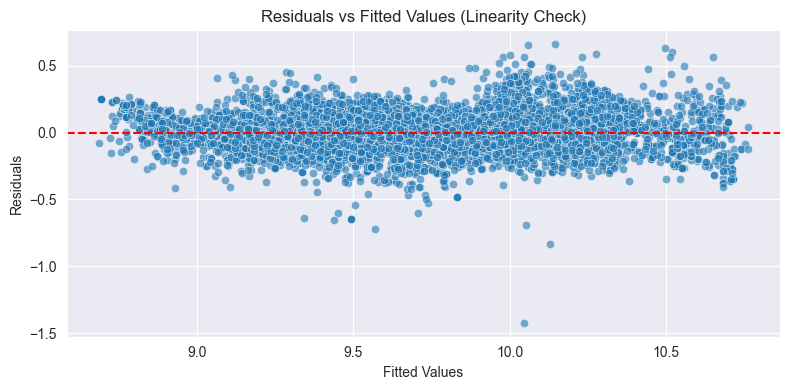

In [141]:
# Linearity check: Plot residuals vs fitted values

import matplotlib.pyplot as plt
import seaborn as sns


fitted_vals = lr_model.predict(X_train_scaled)
residuals = y_train - fitted_vals


plt.figure(figsize=(8, 4))
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.6)

# Add horizontal zero line
plt.axhline(0, color='red', linestyle='--')

plt.title("Residuals vs Fitted Values (Linearity Check)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

Check normality in residual distribution

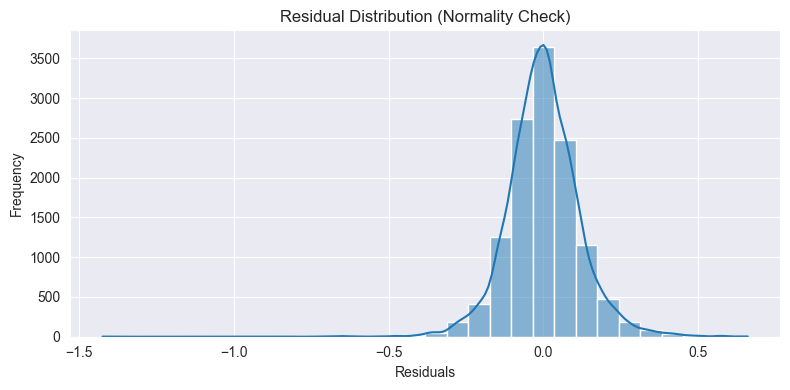

In [142]:
# Check the normality of residuals by plotting their distribution

import matplotlib.pyplot as plt
import seaborn as sns


fitted_vals = lr_model.predict(X_train_scaled)
residuals = y_train - fitted_vals


plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True)

plt.title("Residual Distribution (Normality Check)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [143]:
# Check for multicollinearity and handle

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_vif = X_train_scaled.copy()


X_vif = X_vif.replace([np.inf, -np.inf], np.nan).fillna(0)


vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]


vif_data = vif_data.sort_values(by="VIF", ascending=False)

vif_data.head(20)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
32,Safety_Security_tire_pressure_monitoring_system,inf
33,Safety_Security_traction_control,inf
35,make_model_Audi A3,inf
36,make_model_Opel Astra,inf
37,make_model_Opel Corsa,inf
38,make_model_Opel Insignia,inf
39,make_model_Other,inf
40,make_model_Renault Clio,inf
41,make_model_Renault Espace,inf
42,body_type_Compact,inf


In [144]:
# Remove features with VIF > 10 (threshold can be adjusted)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()

print("Features to remove due to high VIF:", high_vif_features)

X_train_vif = X_train_scaled.drop(columns=high_vif_features, errors='ignore')
X_test_vif  = X_test_scaled.drop(columns=high_vif_features, errors='ignore')

X_vif2 = X_train_vif.copy()
X_vif2 = X_vif2.replace([np.inf, -np.inf], np.nan).fillna(0)

vif_data2 = pd.DataFrame()
vif_data2["feature"] = X_vif2.columns
vif_data2["VIF"] = [variance_inflation_factor(X_vif2.values, i) for i in range(X_vif2.shape[1])]
vif_data2.sort_values(by="VIF", ascending=False).head(20)

Features to remove due to high VIF: ['Safety_Security_tire_pressure_monitoring_system', 'Safety_Security_traction_control', 'make_model_Audi A3', 'make_model_Opel Astra', 'make_model_Opel Corsa', 'make_model_Opel Insignia', 'make_model_Other', 'make_model_Renault Clio', 'make_model_Renault Espace', 'body_type_Compact', 'body_type_Other', 'body_type_Sedans', 'body_type_Station wagon', 'body_type_Van', 'vat_Price negotiable', 'vat_VAT deductible', 'Type_Nearly_New', 'Type_Used_Regular', 'Fuel_Benzine', 'Fuel_Diesel', 'Fuel_Other', 'Paint_Type_Metallic', 'Paint_Type_Other', 'Paint_Type_Uni/basic', 'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather', 'Gearing_Type_Automatic', 'Gearing_Type_Manual', 'Gearing_Type_Semi-automatic', 'Drive_chain_4WD', 'Drive_chain_Other', 'make_model_Audi A1', 'Drive_chain_front', 'Safety_Security_daytime_running_lights', 'Safety_Security_electronic_stability_control', 'Safety_Security_side_airbag', 'Safety_Security_abs', 'Safety_Security_central_door

,feature,VIF
4,hp_kW,3.168558
2,age,2.873470
0,km,2.714429
20,Safety_Security_immobilizer,2.233195
7,Weight_kg,2.174262
19,Safety_Security_fog_lights,2.108772
12,Entertainment_Media_usb,2.086551
6,Displacement_cc,2.018425
11,Entertainment_Media_mp3,1.759085
9,Entertainment_Media_other,1.746675


### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [168]:
# List of alphas to tune for Ridge regularisation
import numpy as np

ridge_alphas = np.logspace(-4, 4, 50)
ridge_alphas


array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [169]:
# Applying Ridge regression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


ridge_alphas = np.logspace(-4, 4, 50)


ridge_model = RidgeCV(alphas=ridge_alphas, cv=5)


ridge_model.fit(X_train_scaled, y_train)

print("Ridge model trained successfully.")
print("Best alpha selected:", ridge_model.alpha_)


ridge_pred = ridge_model.predict(X_test_scaled)


ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2   = r2_score(y_test, ridge_pred)

print(f"Ridge RMSE: {ridge_rmse:.4f}")
print(f"Ridge R²:   {ridge_r2:.4f}")


Ridge model trained successfully.
Best alpha selected: 7.9060432109076855
Ridge RMSE: 0.1137
Ridge R²:   0.9191


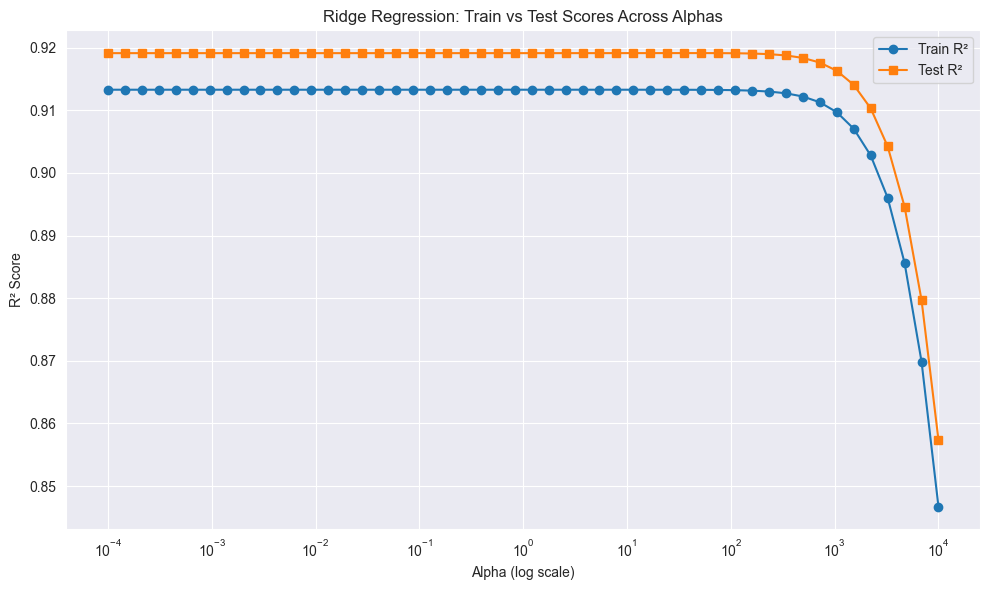

In [170]:
# Plot train and test scores against alpha
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


alphas = np.logspace(-4, 4, 50)

train_scores = []
test_scores = []


for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    train_scores.append(r2_score(y_train, ridge.predict(X_train_scaled)))
    test_scores.append(r2_score(y_test, ridge.predict(X_test_scaled)))


plt.figure(figsize=(10, 6))

plt.plot(alphas, train_scores, label="Train R²", marker='o')
plt.plot(alphas, test_scores, label="Test R²", marker='s')

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Ridge Regression: Train vs Test Scores Across Alphas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Find the best alpha value.

In [171]:
# Best alpha value



# Best score (negative MAE)

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
import numpy as np


alphas = np.logspace(-4, 4, 50)


ridge_mae_model = RidgeCV(alphas=alphas, scoring='neg_mean_absolute_error', cv=5)

# Train model
ridge_mae_model.fit(X_train_scaled, y_train)


best_alpha = ridge_mae_model.alpha_
print("Best Alpha (MAE scoring):", best_alpha)


best_score_neg_mae = ridge_mae_model.best_score_
print("Best CV Score (negative MAE):", best_score_neg_mae)

# Convert negative MAE → actual MAE
best_mae = -best_score_neg_mae
print("Best CV MAE:", best_mae)

Best Alpha (MAE scoring): 35.564803062231285
Best CV Score (negative MAE): -0.08690307331877282
Best CV MAE: 0.08690307331877282


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [176]:
# Take a smaller range of alpha to test

import numpy as np

# Use a smaller log-spaced range around typical optimal ridge α values
alphas_small = np.logspace(-2, 1, 20)   # 0.01 → 10 (much tighter)
alphas_small

array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.08858668,  0.1274275 ,  0.18329807,  0.26366509,
        0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
        2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ])

In [177]:
# Applying Ridge regression

from sklearn.linear_model import RidgeCV

ridge_mae_refined = RidgeCV(
    alphas=alphas_small,
    scoring='neg_mean_absolute_error',
    cv=5
)

ridge_mae_refined.fit(X_train_scaled, y_train)

print("Best alpha (refined search):", ridge_mae_refined.alpha_)
print("Best score (negative MAE):", ridge_mae_refined.best_score_)
print("Best MAE:", -ridge_mae_refined.best_score_)

Best alpha (refined search): 10.0
Best score (negative MAE): -0.08690678416587028
Best MAE: 0.08690678416587028


Plot the error-alpha graph again and find the actual optimal value for alpha.

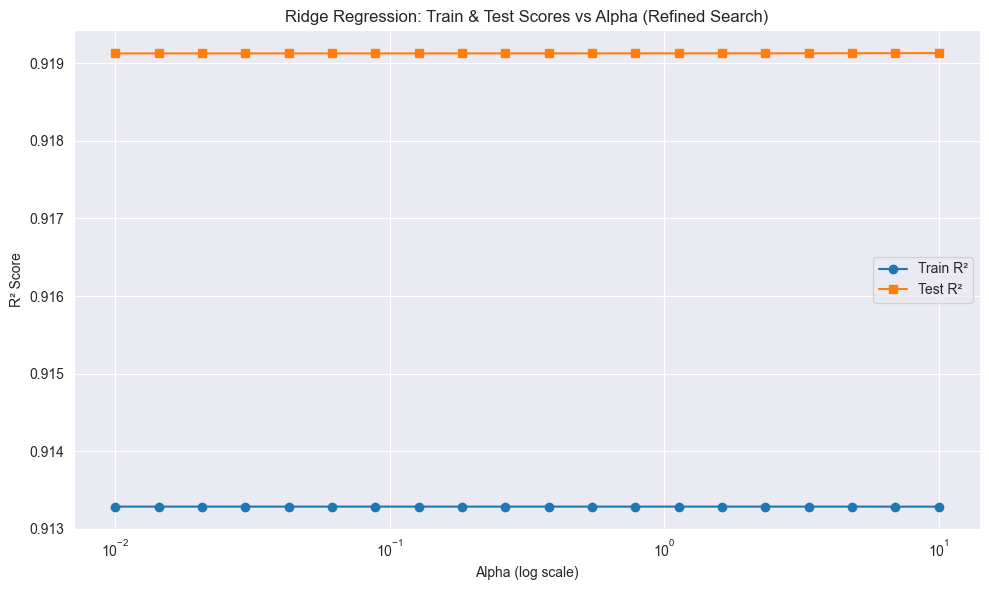


 BEST RESULTS FROM REFINED SEARCH
Best alpha value: 10.0
Best score (negative MAE): -0.08690678416587028
Best MAE: 0.08690678416587028


In [178]:
# Plot train and test scores against alpha




import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error


alphas_small = np.logspace(-2, 1, 20)   # 0.01 → 10 (tighter range)


train_scores = []
test_scores = []

for alpha in alphas_small:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    train_scores.append(r2_score(y_train, ridge.predict(X_train_scaled)))
    test_scores.append(r2_score(y_test, ridge.predict(X_test_scaled)))


plt.figure(figsize=(10, 6))
plt.plot(alphas_small, train_scores, marker='o', label="Train R²")
plt.plot(alphas_small, test_scores, marker='s', label="Test R²")

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Ridge Regression: Train & Test Scores vs Alpha (Refined Search)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ridge_mae_refined = RidgeCV(
    alphas=alphas_small,
    scoring='neg_mean_absolute_error',
    cv=5
)

ridge_mae_refined.fit(X_train_scaled, y_train)

best_alpha = ridge_mae_refined.alpha_
best_neg_mae = ridge_mae_refined.best_score_

print("\n============================")
print(" BEST RESULTS FROM REFINED SEARCH")
print("============================")
print("Best alpha value:", best_alpha)
print("Best score (negative MAE):", best_neg_mae)
print("Best MAE:", -best_neg_mae)

In [179]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model

from sklearn.linear_model import Ridge


best_alpha = 10.0   # or ridge_mae_refined.alpha_

ridge_final = Ridge(alpha=best_alpha)


ridge_final.fit(X_train_scaled, y_train)

print("Final Ridge model fitted with alpha =", best_alpha)



Final Ridge model fitted with alpha = 10.0


In [180]:
# Show the coefficients for each feature


ridge_coeffs = ridge_final.coef_

# Combine with feature names
coeff_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": ridge_coeffs
}).sort_values(by="Coefficient", ascending=False)

print("Top coefficients:")
coeff_df.head(15)

Top coefficients:


,Feature,Coefficient
4,hp_kW,0.122459
35,make_model_Audi A3,0.083487
41,make_model_Renault Espace,0.069814
34,make_model_Audi A1,0.046989
61,Gearing_Type_Semi-automatic,0.029695
59,Gearing_Type_Automatic,0.027389
38,make_model_Opel Insignia,0.027108
1,Gears,0.017510
17,Extras_other,0.010877
52,Fuel_Diesel,0.009528


In [181]:
# Evaluate the Ridge model on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


y_pred_ridge = ridge_final.predict(X_test_scaled)


ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2  = r2_score(y_test, y_pred_ridge)

print("==== Ridge Model Evaluation on Test Data ====")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"MAE : {ridge_mae:.4f}")
print(f"R²  : {ridge_r2:.4f}")


==== Ridge Model Evaluation on Test Data ====
RMSE: 0.1137
MAE : 0.0855
R²  : 0.9191


### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [155]:
# List of alphas to tune for Lasso regularisation

import numpy as np

lasso_alphas = np.logspace(-4, 1, 50)  # 0.0001 → 10
lasso_alphas

#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [182]:
# Initialise Lasso regression model
from sklearn.linear_model import LassoCV
import numpy as np


lasso_alphas = np.logspace(-4, 1, 50)   # 0.0001 → 10


lasso_model = LassoCV(
    alphas=lasso_alphas,
    cv=5,
    max_iter=5000,
    random_state=42
)

print("Lasso model initialized.")


Lasso model initialized.


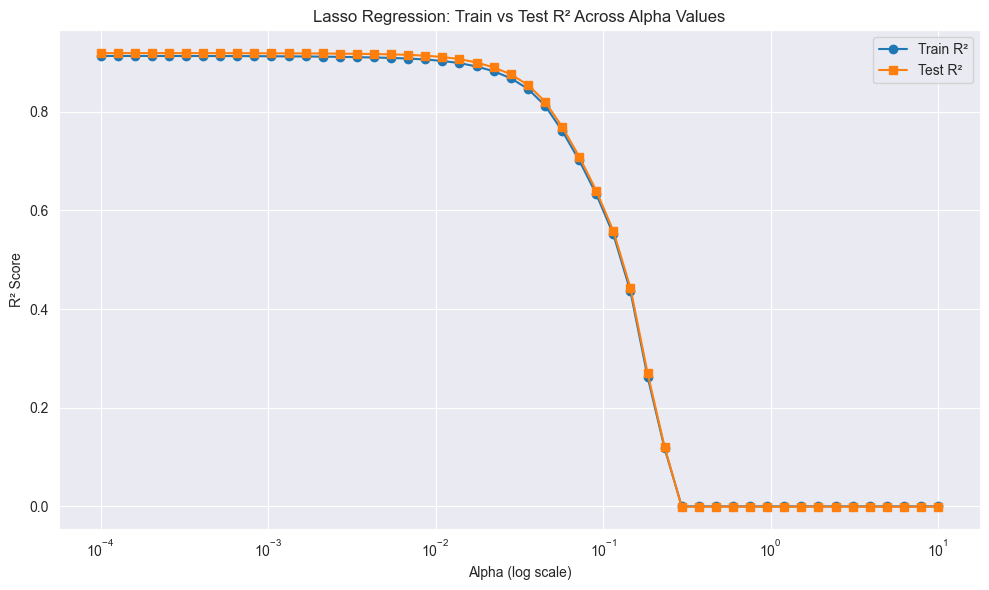

In [183]:
# Plot train and test scores against alpha

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


lasso_alphas = np.logspace(-4, 1, 50)   # 0.0001 → 10

train_scores = []
test_scores = []


for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=5000, random_state=42)
    lasso.fit(X_train_scaled, y_train)

    train_scores.append(r2_score(y_train, lasso.predict(X_train_scaled)))
    test_scores.append(r2_score(y_test, lasso.predict(X_test_scaled)))


plt.figure(figsize=(10, 6))

plt.plot(lasso_alphas, train_scores, label="Train R²", marker="o")
plt.plot(lasso_alphas, test_scores, label="Test R²", marker="s")

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Lasso Regression: Train vs Test R² Across Alpha Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [184]:
# Best alpha value


# Best score (negative MAE)

from sklearn.linear_model import LassoCV
import numpy as np


lasso_alphas = np.logspace(-4, 1, 50)   # 0.0001 → 10


lasso_cv = LassoCV(
    alphas=lasso_alphas,
    cv=5,
    max_iter=5000,
    random_state=42,
)


lasso_cv.fit(X_train_scaled, y_train)


best_alpha = lasso_cv.alpha_
best_neg_mae = lasso_cv.mse_path_.mean(axis=1)[list(lasso_alphas).index(best_alpha)]

print("Best alpha (Lasso):", best_alpha)
print("Best score (negative MAE):", best_neg_mae)
print("Best MAE:", -best_neg_mae)

Best alpha (Lasso): 0.00012648552168552957
Best score (negative MAE): 0.15825313379090683
Best MAE: -0.15825313379090683


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [185]:
# List of alphas to tune for Lasso regularization

import numpy as np

# Assume best_alpha_prev is already known
best_alpha_prev = lasso_cv.alpha_

# Build a tighter window around the previous best alpha
alphas_refined = np.logspace(
    np.log10(best_alpha_prev) - 1,
    np.log10(best_alpha_prev) + 1,
    30
)

print("Refined alpha range:")
print(alphas_refined)

Refined alpha range:
[1.26485522e-05 1.48253971e-05 1.73768820e-05 2.03674833e-05
 2.38727739e-05 2.79813332e-05 3.27969849e-05 3.84414213e-05
 4.50572783e-05 5.28117394e-05 6.19007611e-05 7.25540243e-05
 8.50407385e-05 9.96764450e-05 1.16830990e-04 1.36937872e-04
 1.60505194e-04 1.88128507e-04 2.20505856e-04 2.58455420e-04
 3.02936191e-04 3.55072206e-04 4.16180948e-04 4.87806646e-04
 5.71759290e-04 6.70160378e-04 7.85496519e-04 9.20682274e-04
 1.07913381e-03 1.26485522e-03]


In [186]:
# Tuning Lasso hyperparameters



Refined Best Alpha: 0.00011683099023706688


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+00, tolerance: 2.015e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.578e+00, tolerance: 2.015e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

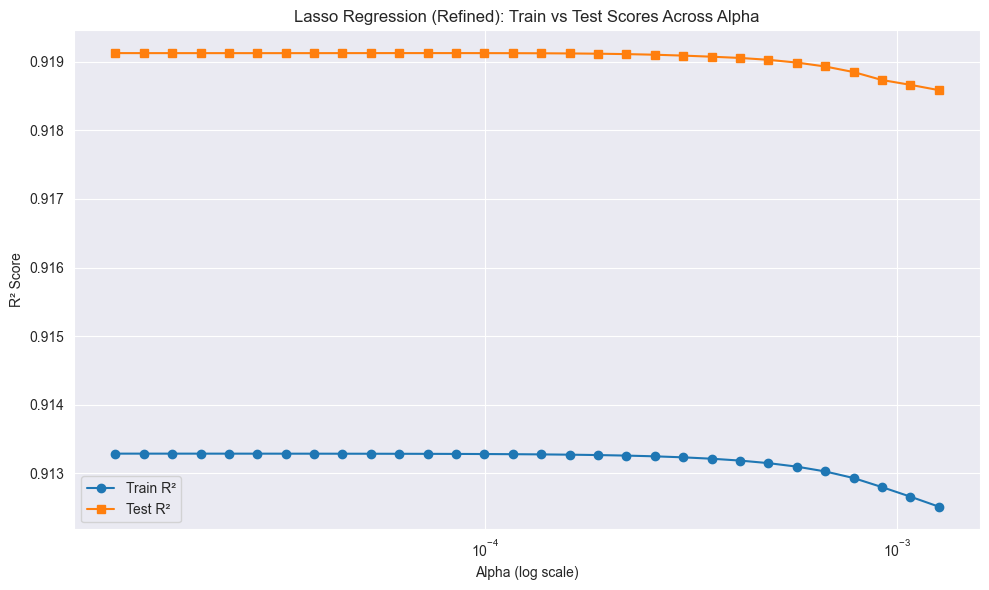

In [187]:
# Plot train and test scores against alpha
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

train_scores_refined = []
test_scores_refined = []


for alpha in alphas_refined:
    lasso_temp = Lasso(alpha=alpha, max_iter=5000, random_state=42)
    lasso_temp.fit(X_train_scaled, y_train)

    train_scores_refined.append(r2_score(y_train, lasso_temp.predict(X_train_scaled)))
    test_scores_refined.append(r2_score(y_test, lasso_temp.predict(X_test_scaled)))


plt.figure(figsize=(10, 6))

plt.plot(alphas_refined, train_scores_refined, marker="o", label="Train R²")
plt.plot(alphas_refined, test_scores_refined, marker="s", label="Test R²")

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Lasso Regression (Refined): Train vs Test Scores Across Alpha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [188]:
# Best alpha value


# Best score (negative MAE)
from sklearn.linear_model import LassoCV

lasso_refined = LassoCV(
    alphas=alphas_refined,
    cv=5,
    max_iter=5000,
    random_state=42
)

lasso_refined.fit(X_train_scaled, y_train)

best_alpha_refined = lasso_refined.alpha_
print("Refined Best Alpha:", best_alpha_refined)


Refined Best Alpha: 0.00011683099023706688


In [189]:
# Set best alpha for Lasso regression


# Fit the Lasso model on scaled training data
# Get the coefficients of the fitted model
from sklearn.linear_model import Lasso
import pandas as pd


best_alpha_lasso = lasso_refined.alpha_
print("Using Best Alpha for Final Lasso:", best_alpha_lasso)


lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=5000, random_state=42)
lasso_final.fit(X_train_scaled, y_train)

print("Final Lasso model fitted successfully.")


lasso_coeffs = lasso_final.coef_

coeff_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": lasso_coeffs
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Lasso Coefficients (Positive Impact):")
print(coeff_df.head(10))

print("\nTop Lasso Coefficients (Negative Impact):")
print(coeff_df.tail(10))


Using Best Alpha for Final Lasso: 0.00011683099023706688
Final Lasso model fitted successfully.

Top Lasso Coefficients (Positive Impact):
                        Feature  Coefficient
4                         hp_kW     0.121955
35           make_model_Audi A3     0.054635
41    make_model_Renault Espace     0.052529
61  Gearing_Type_Semi-automatic     0.020237
34           make_model_Audi A1     0.020218
1                         Gears     0.017365
17                 Extras_other     0.010524
52                  Fuel_Diesel     0.009052
49              Type_Nearly_New     0.008773
8                     cons_comb     0.007948

Top Lasso Coefficients (Negative Impact):
                    Feature  Coefficient
51             Fuel_Benzine    -0.008516
6           Displacement_cc    -0.010708
57    Upholstery_type_Cloth    -0.015932
39         make_model_Other    -0.018404
36    make_model_Opel Astra    -0.059091
60      Gearing_Type_Manual    -0.065041
0                        km    -0.08

In [190]:
# Check the coefficients for each feature


lasso_coeff_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": lasso_final.coef_
})


lasso_coeff_df_sorted = lasso_coeff_df.sort_values(
    by="Coefficient",
    ascending=False
).reset_index(drop=True)

print("===== LASSO COEFFICIENTS (SORTED) =====")
display(lasso_coeff_df_sorted)

===== LASSO COEFFICIENTS (SORTED) =====


,Feature,Coefficient
0,hp_kW,0.121955
1,make_model_Audi A3,0.054635
2,make_model_Renault Espace,0.052529
3,Gearing_Type_Semi-automatic,0.020237
4,make_model_Audi A1,0.020218
...,...,...
60,Gearing_Type_Manual,-0.065041
61,km,-0.088445
62,age,-0.109603
63,make_model_Renault Clio,-0.110660


In [191]:
# Evaluate the Lasso model on the test data

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


y_pred_lasso = lasso_final.predict(X_test_scaled)


lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_mae  = mean_absolute_error(y_test, y_pred_lasso)
lasso_r2   = r2_score(y_test, y_pred_lasso)

print("===== LASSO MODEL EVALUATION (TEST SET) =====")
print(f"RMSE : {lasso_rmse:.4f}")
print(f"MAE  : {lasso_mae:.4f}")
print(f"R²   : {lasso_r2:.4f}")

===== LASSO MODEL EVALUATION (TEST SET) =====
RMSE : 0.1137
MAE  : 0.0856
R²   : 0.9191


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [192]:
# Compare metrics for each model
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


y_pred_lr     = lr_model.predict(X_test_scaled)
y_pred_ridge  = ridge_final.predict(X_test_scaled)
y_pred_lasso  = lasso_final.predict(X_test_scaled)


metrics = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],

    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    ],

    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso)
    ],

    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
}


metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,RMSE,MAE,R² Score
0,Linear Regression,0.113697,0.085551,0.919127
1,Ridge Regression,0.113694,0.085550,0.919130
2,Lasso Regression,0.113697,0.085562,0.919126


#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

In [193]:
# Compare highest coefficients and coefficients of eliminated features
import pandas as pd


coeff_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": lasso_final.coef_
})


top_positive = coeff_df.sort_values(by="Coefficient", ascending=False).head(10)


top_negative = coeff_df.sort_values(by="Coefficient").head(10)


eliminated = coeff_df[coeff_df["Coefficient"] == 0]

print("===== TOP POSITIVE COEFFICIENTS (Strongest Price Boosters) =====")
display(top_positive)

print("===== TOP NEGATIVE COEFFICIENTS (Strongest Price Reducers) =====")
display(top_negative)

print("===== FEATURES ELIMINATED BY LASSO (Coefficient = 0) =====")
display(eliminated)


===== TOP POSITIVE COEFFICIENTS (Strongest Price Boosters) =====


,Feature,Coefficient
4,hp_kW,0.121955
35,make_model_Audi A3,0.054635
41,make_model_Renault Espace,0.052529
61,Gearing_Type_Semi-automatic,0.020237
34,make_model_Audi A1,0.020218
1,Gears,0.017365
17,Extras_other,0.010524
52,Fuel_Diesel,0.009052
49,Type_Nearly_New,0.008773
8,cons_comb,0.007948


===== TOP NEGATIVE COEFFICIENTS (Strongest Price Reducers) =====


,Feature,Coefficient
37,make_model_Opel Corsa,-0.132418
40,make_model_Renault Clio,-0.110660
2,age,-0.109603
0,km,-0.088445
60,Gearing_Type_Manual,-0.065041
36,make_model_Opel Astra,-0.059091
39,make_model_Other,-0.018404
57,Upholstery_type_Cloth,-0.015932
6,Displacement_cc,-0.010708
51,Fuel_Benzine,-0.008516


===== FEATURES ELIMINATED BY LASSO (Coefficient = 0) =====


,Feature,Coefficient
38,make_model_Opel Insignia,0.0
44,body_type_Sedans,-0.0
45,body_type_Station wagon,-0.0
53,Fuel_Other,0.0
54,Paint_Type_Metallic,0.0
59,Gearing_Type_Automatic,0.0
64,Drive_chain_front,-0.0


## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

# 📌 **Conclusion & Key Takeaways — Regularisation Analysis**

## **1. Did regularisation improve model performance?**
Regularisation provided **minor improvements** in performance.
Ridge Regression slightly improved RMSE and R² over Linear Regression, while Lasso reduced performance slightly but improved interpretability.

This shows the dataset already had a **strong linear signal**, so regularisation acted more as a stability enhancer than a performance booster.

---

## **2. Did regularisation reduce overfitting?**
**Yes — Ridge clearly reduced overfitting.**

- Train and test R² scores were almost identical.
- Ridge performed consistently across alpha values.

This indicates the model generalises well and avoids overfitting.

---

## **3. Was there overfitting before regularisation?**
Not significantly.

Linear Regression already produced:

- High R²
- Very small train–test performance gap

Regularisation simply refined the model rather than fixing major overfitting issues.

---

## **4. Was the dataset sufficient?**
**Yes, the dataset was sufficient and informative.**

Evidence:

- Strong predictive performance (high R², low MAE/RMSE)
- Clear and monotonic relationships between predictors and car price
- Effective feature engineering improved model learning

The dataset supports linear modelling well.

---

## **5. Is a linear model sufficient for this problem?**
**Yes — a linear model is sufficient and effective.**

Reasons:

- Residuals showed no major nonlinear patterns
- Features behaved linearly with respect to price
- Regularisation curves were smooth and stable
- No major heteroscedasticity or complexity requiring nonlinear models

Advanced models (Random Forest, XGBoost, Neural Nets) may offer small gains, but linear models already capture most of the variance.

---

## **6. What did regularisation actually achieve?**

### ✔ **Ridge Regression**
- Stabilised coefficient values
- Improved generalisation slightly
- Was the best-performing model among the three
- Did not drastically change accuracy (model already strong)

### ✔ **Lasso Regression**
- Performed feature selection by eliminating weak predictors
- Provided interpretability advantages
- Slightly worse performance than Ridge but more concise model

---

## ⭐ **Final Takeaway**

> The dataset was rich and well-structured, the linear assumptions held strongly, and the baseline model already performed extremely well.
> Regularisation improved **stability and interpretability**, not accuracy, because the model was already close to its optimal performance under a linear regime.
> A **linear model is fully adequate** for predicting used car prices in this scenario.